# DuPont Mixture Design

## Alison Shapiro, Sean Farrington, and Peter Osazuwa

***Machine Learning Techniques Used:*** 

Linear Regression

Gaussian Process Regression

***Breakdown of Algorithm Strategy:***

Normalize data (Not done yet)

Define our model

    Linear Regression
    Gaussian Process Regression
        kernel --> Choose kernels to select from

K-Fold Validation

Visualize our Predictions

Export as Excel Table

# Linear Regression

Could be run as an independent script

### Import necessary Packages:

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_percentage_error as mape, r2_score
import matplotlib.pyplot as plt

### Data Import
Read in data from excel file using pandas

In [2]:
file = 'DATA/training_inputs.xlsx'

df = pd.read_excel(file)

design = ['Powdered Additive','Base Resin A','Base Resin B','Stabilizer','Temperature','Screw Speed (RPM)']
performance = ['Toughness (J/m2)','Modulus (GPa)']

X = df[design]
y = df[performance]

In [3]:
X.head()
y.head()

,Toughness (J/m2),Modulus (GPa)
0,643,5.6
1,603,4.7
2,685,3.9
3,536,5.2
4,491,7.1


### Linear Regression

In [4]:
reg = LinearRegression(fit_intercept = True).fit(X,y)

reg.coef_

array([[ 5.29070274e+02, -8.89410366e+02, -4.72852889e+02,
         3.12053559e+02, -3.08186735e+00, -3.46899141e-01],
       [ 3.12380620e+00, -1.90178120e+00,  7.07461274e+00,
         1.32775246e+01, -1.04198623e-01, -7.13341678e-03]])

### Linear Regression Metrics

In [5]:
y_pred_LR = reg.predict(X)

y_pred_LR = pd.DataFrame(data=y_pred_LR,
                     columns = performance)

nn = 0
r2_0 = r2_score(y[performance[nn]],y_pred_LR[performance[nn]])
print(f'R^2 for {performance[nn]}: {r2_0}')
nn = 1
r2_1 = r2_score(y[performance[nn]],y_pred_LR[performance[nn]])
print(f'R^2 for {performance[nn]}: {r2_1}')

R^2 for Toughness (J/m2): 0.9651824832844537
R^2 for Modulus (GPa): 0.93763884340175


### Plotting

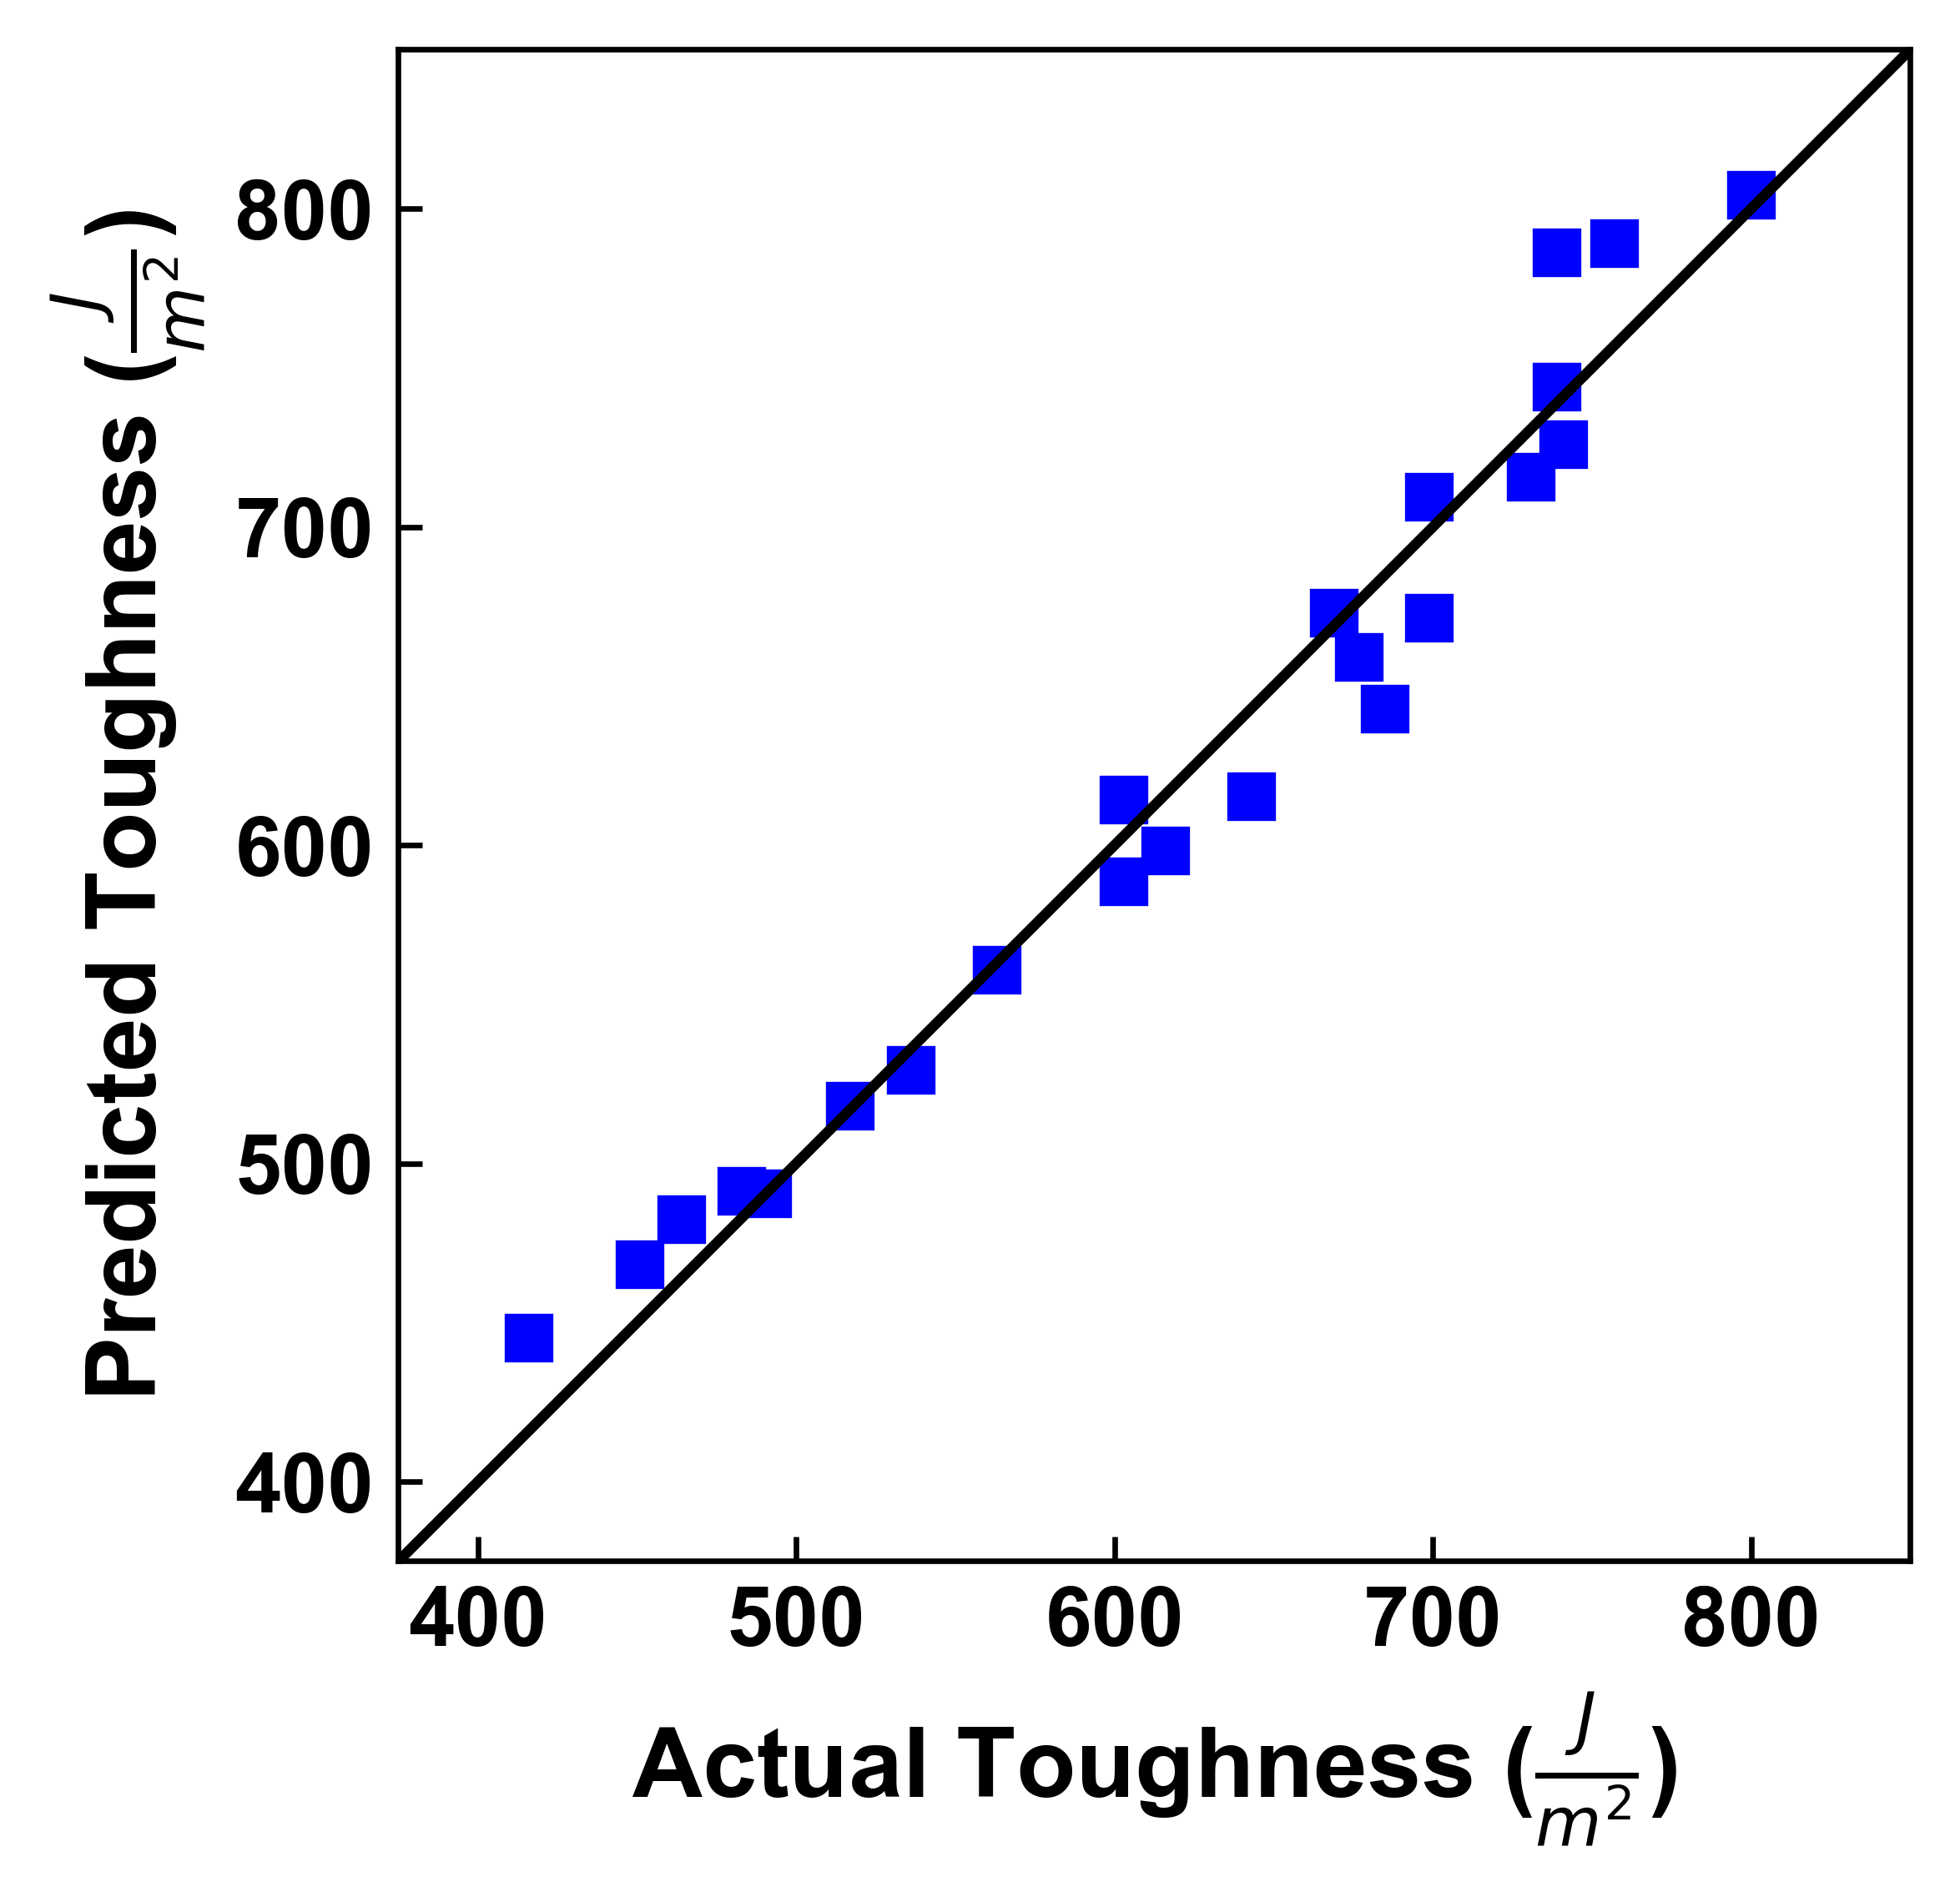

In [6]:
i = 1
dpi = 70
if i == 1:
    dpi = 600
    
lrg = 20
med = 14
sml = 12
fontname = "Arial"
    
fig,ax = plt.subplots(dpi=dpi)
nn = 0
ax.plot(y[performance[nn]],y_pred_LR[performance[nn]],'bs')
low = 375
high = 850
ax.plot([low,high],[low,high],'k-')
ax.set_xlim([low,high])
ax.set_ylim([low,high])
ax.set_xlabel(r'Actual Toughness ($\frac{J}{m^2}$)',
             fontsize=med,
             fontweight="bold",
             fontname=fontname)
ax.set_ylabel(r'Predicted Toughness ($\frac{J}{m^2}$)',
             fontsize=med,
             fontweight="bold",
             fontname=fontname)
ax.tick_params(axis='both',
               labelsize=sml,
               direction = 'in')
plt.xticks(fontweight="bold",
           fontname=fontname)
plt.yticks(fontweight="bold",
           fontname=fontname)
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
plt.savefig('FIGURES/LR_training_toughness_parity.svg')
plt.show()

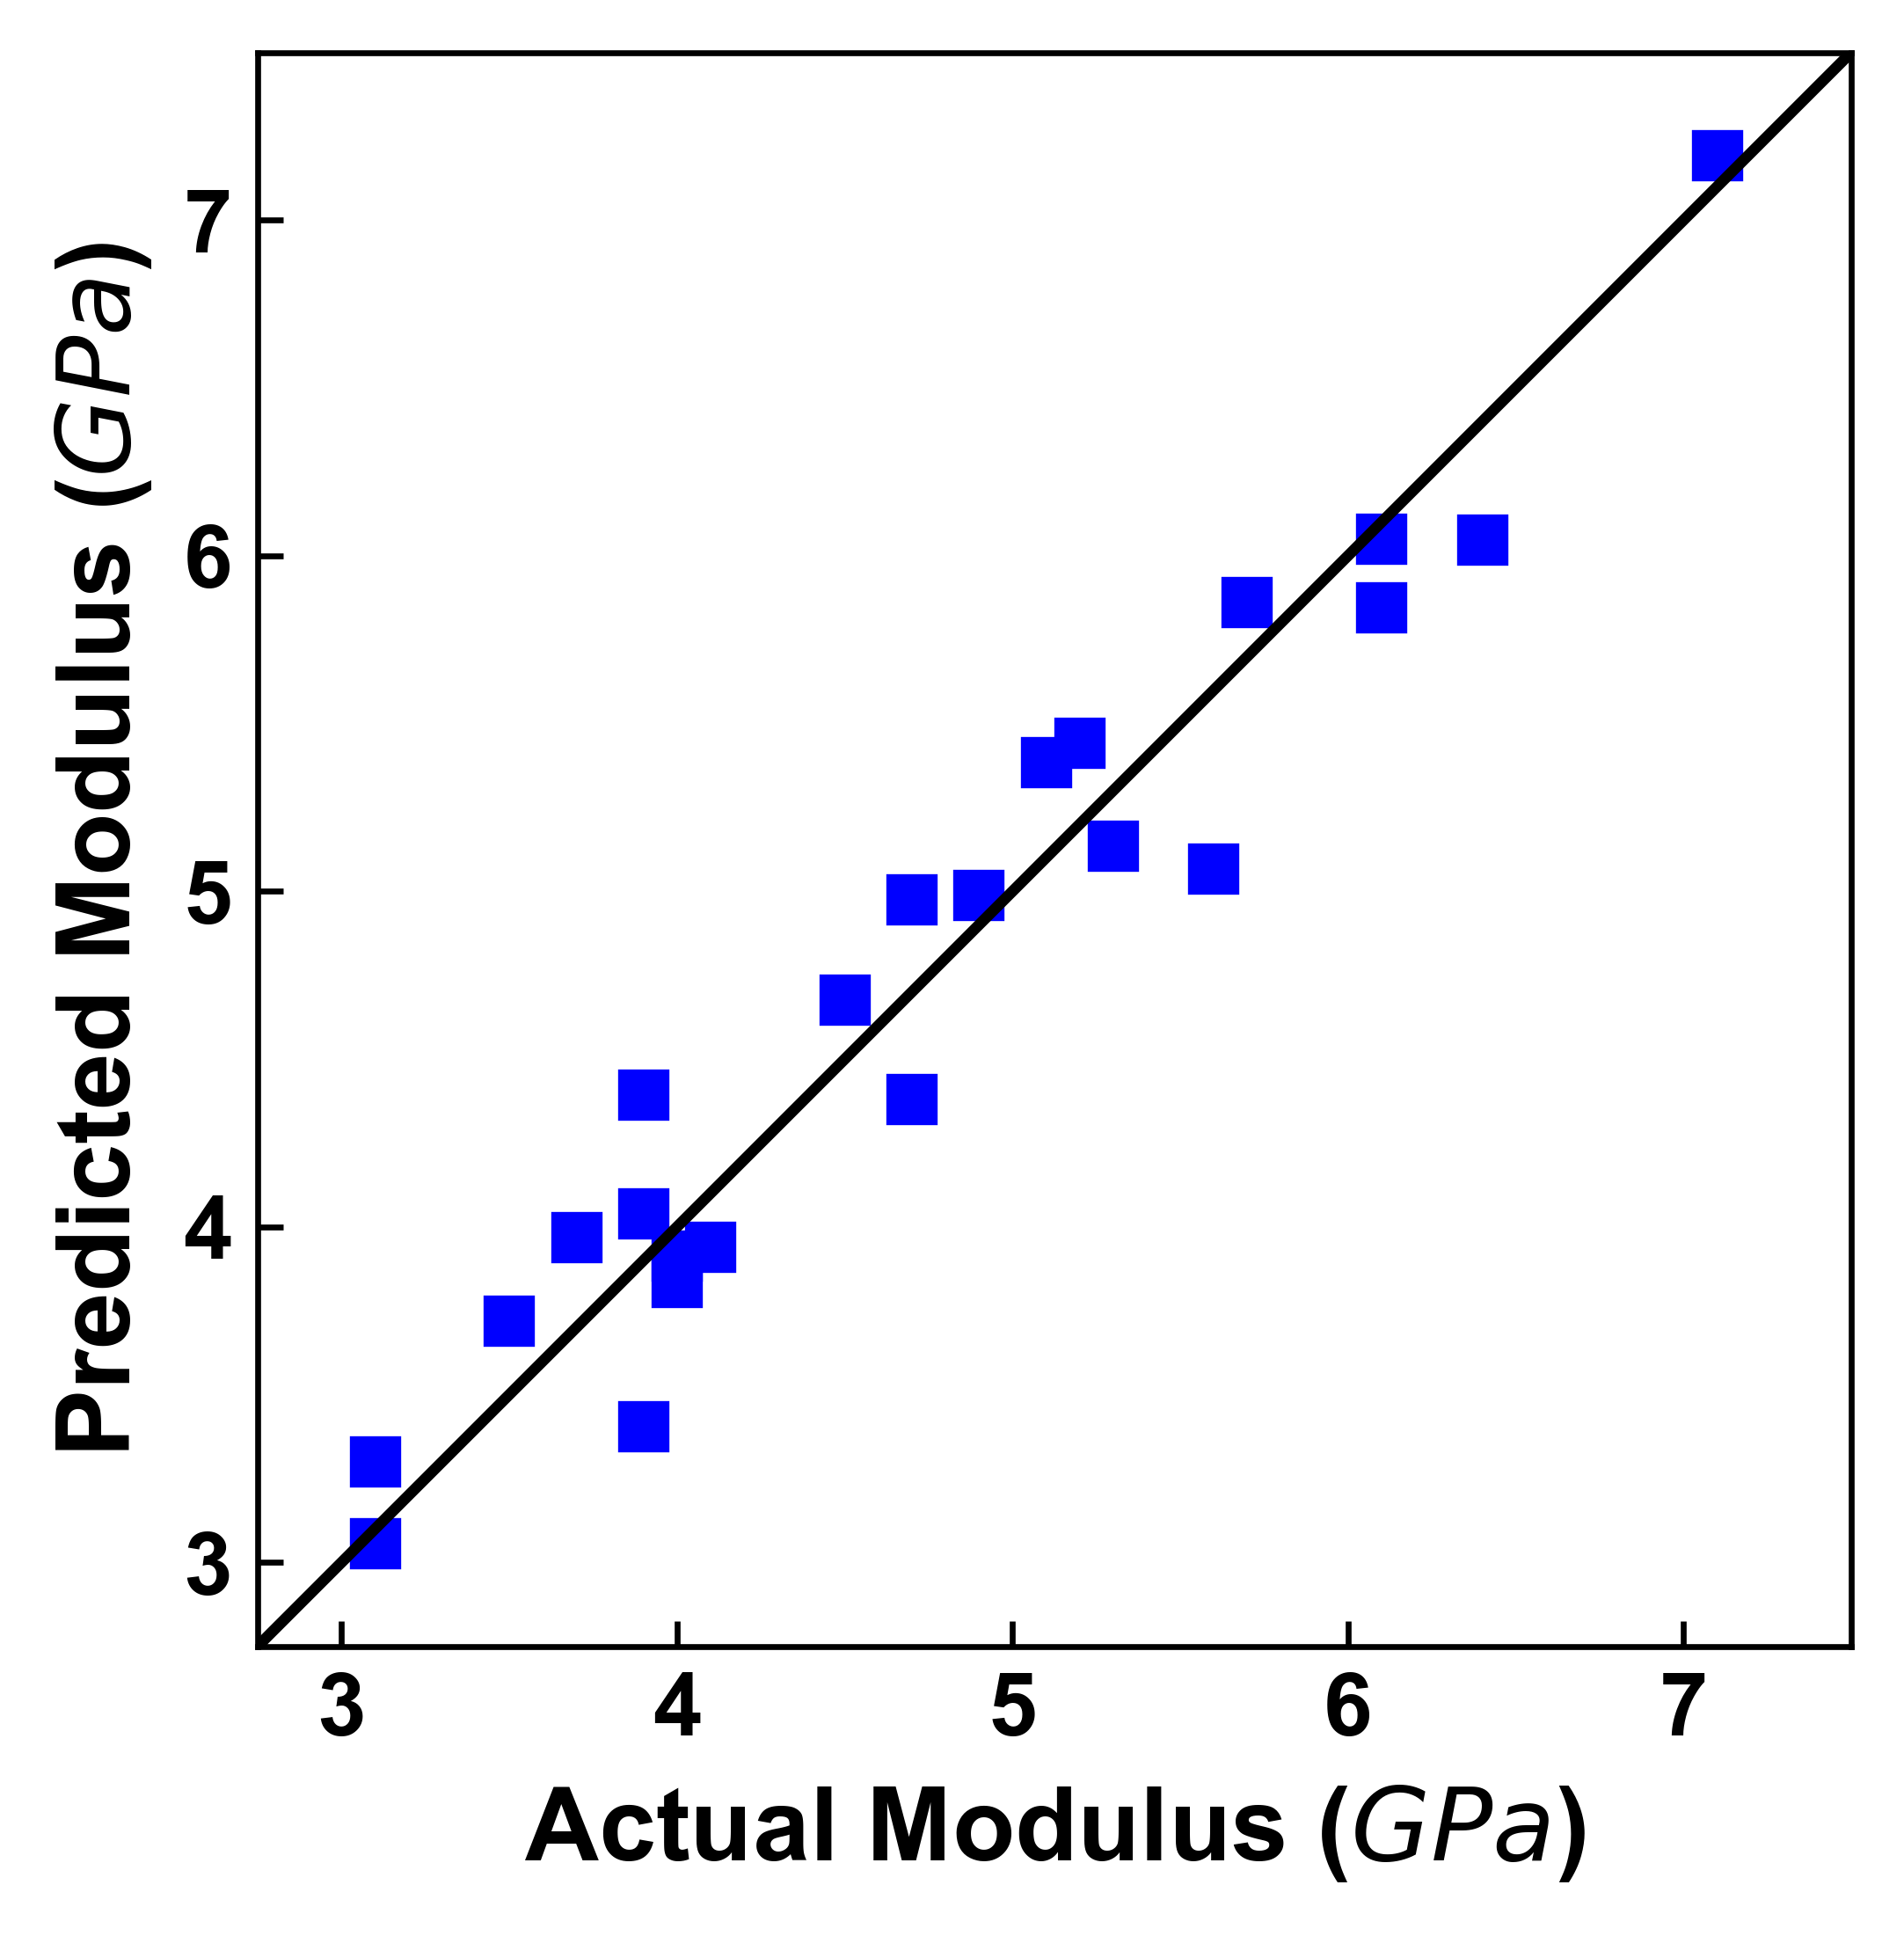

In [7]:
fig,ax = plt.subplots(dpi=dpi)
nn = 1
ax.plot(y[performance[nn]],y_pred_LR[performance[nn]],'bs')
low = 2.75
high = 7.5
ax.plot([low,high],[low,high],'k-')
ax.set_xlim([low,high])
ax.set_ylim([low,high])
ax.set_xlabel(r'Actual Modulus ($GPa$)',
             fontsize=med,
             fontweight="bold",
             fontname=fontname)
ax.set_ylabel(r'Predicted Modulus ($GPa$)',
             fontsize=med,
             fontweight="bold",
             fontname=fontname)
ax.tick_params(axis='both',
               labelsize=sml,
               direction = 'in')
plt.xticks(fontweight="bold",
           fontname=fontname)
plt.yticks(fontweight="bold",
           fontname=fontname)
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
plt.savefig('FIGURES/LR_training_modulus_parity.svg')
plt.show()

### KFold Validation

In [8]:
k = 5 
kf = KFold(n_splits=k,shuffle=True,random_state=1743)

model = LinearRegression()
mape_scores_tough = []
mape_scores_mod = []
r2_scores_mod = []
r2_scores_tough = []

X_np = X.to_numpy()
y_np = y.to_numpy()

for train_index, test_index in kf.split(X_np):
    # Splitting into training and testing arrays
    X_train, X_test = X_np[train_index],X_np[test_index]
    y_train, y_test = y_np[train_index],y_np[test_index]
    
    # Train the model
    model.fit(X_train,y_train)
    
    # Predictions
    y_p = model.predict(X_test)
    
    # Metric for validation
    mape_tough = mape(y_test[:,0],y_p[:,0])
    mape_mod = mape(y_test[:,1],y_p[:,1])
    #Append to list of MSE
    mape_scores_tough.append(mape_tough)
    mape_scores_mod.append(mape_mod)
    
    r2_tough = r2_score(y_test[:,0],y_p[:,0])
    r2_mod = r2_score(y_test[:,1],y_p[:,1])
    
    r2_scores_tough.append(r2_tough)
    r2_scores_mod.append(r2_mod)

### Make a table of the scores

In [9]:
# Make a table
df_scores = pd.DataFrame({
    'MAPE Toughness':mape_scores_tough,
    'MAPE Modulus':mape_scores_mod,
    'R2 Toughness':r2_scores_tough,
    'R2 Modulus':r2_scores_mod})

df_scores

,MAPE Toughness,MAPE Modulus,R2 Toughness,R2 Modulus
0,0.028428,0.055904,0.950012,0.818966
1,0.027369,0.054929,0.955925,0.879912
2,0.044266,0.075602,0.852972,0.818758
3,0.129267,0.240861,0.483085,-1.573322
4,0.032647,0.043007,0.959599,0.928085


The linear regression seems that it may generalize well because most Folds produce a high $R^2$ on data that was not included in training.

### Export to Excel

In [10]:
df_scores.to_excel('ANALYSIS/LinearRegression_KFold.xlsx',index=False)

### Leave One Out Validation

In [11]:
k = len(X) # Dataset size to do Leave one Out validation
kf = KFold(n_splits=k,shuffle=True,random_state=1743)

model = LinearRegression()

mape_scores_tough = []
mape_scores_mod = []
r2_scores_tough = []
r2_scores_mod = []

for train_index, test_index in kf.split(X_np):
    # Splitting into training and testing arrays
    X_train, X_test = X_np[train_index],X_np[test_index]
    y_train, y_test = y_np[train_index],y_np[test_index]
    
    # Train the model
    model.fit(X_train,y_train)
    
    # Predictions
    y_p = model.predict(X_test)
    
    # Metric for validation
    mape_tough = mape(y_test[:,0],y_p[:,0])
    mape_mod = mape(y_test[:,1],y_p[:,1])
    #Append to list of MSE
    mape_scores_tough.append(mape_tough)
    mape_scores_mod.append(mape_mod)

### Make a Table

In [12]:
df_scores = pd.DataFrame({
    'MAPE Toughness':mape_scores_tough,
    'MAPE Modulus':mape_scores_mod,})  

df_scores

,MAPE Toughness,MAPE Modulus
0,0.044256,0.039513
1,0.032443,0.021905
2,0.017324,0.062968
3,0.007856,0.090655
4,0.023710,0.086559
5,0.025113,0.085101
6,0.021165,0.020117
7,0.047854,0.091465
8,0.028920,0.055316
9,0.005712,0.045163


### Export to Excel

In [13]:
df_scores.to_excel('ANALYSIS/LinearRegression_LOO.xlsx',index=False)

### INPUT TEST SET - LINEAR REGRESSION

Below is the code for importing test data to compare against the predictions for linear regression. In this case we use the linear regression model 'reg' which was trained on all available data.

The code below must be converted from a "raw NBConvert" to a "cell" to be run after the file name is input.

                                  0
R^2 for Toughness (J/m2)   0.694468
R^2 for Modulus (GPa)      0.394732
MAPE for Toughness (J/m2)  0.067206
MAPE for Modulus (GPa)     0.131367


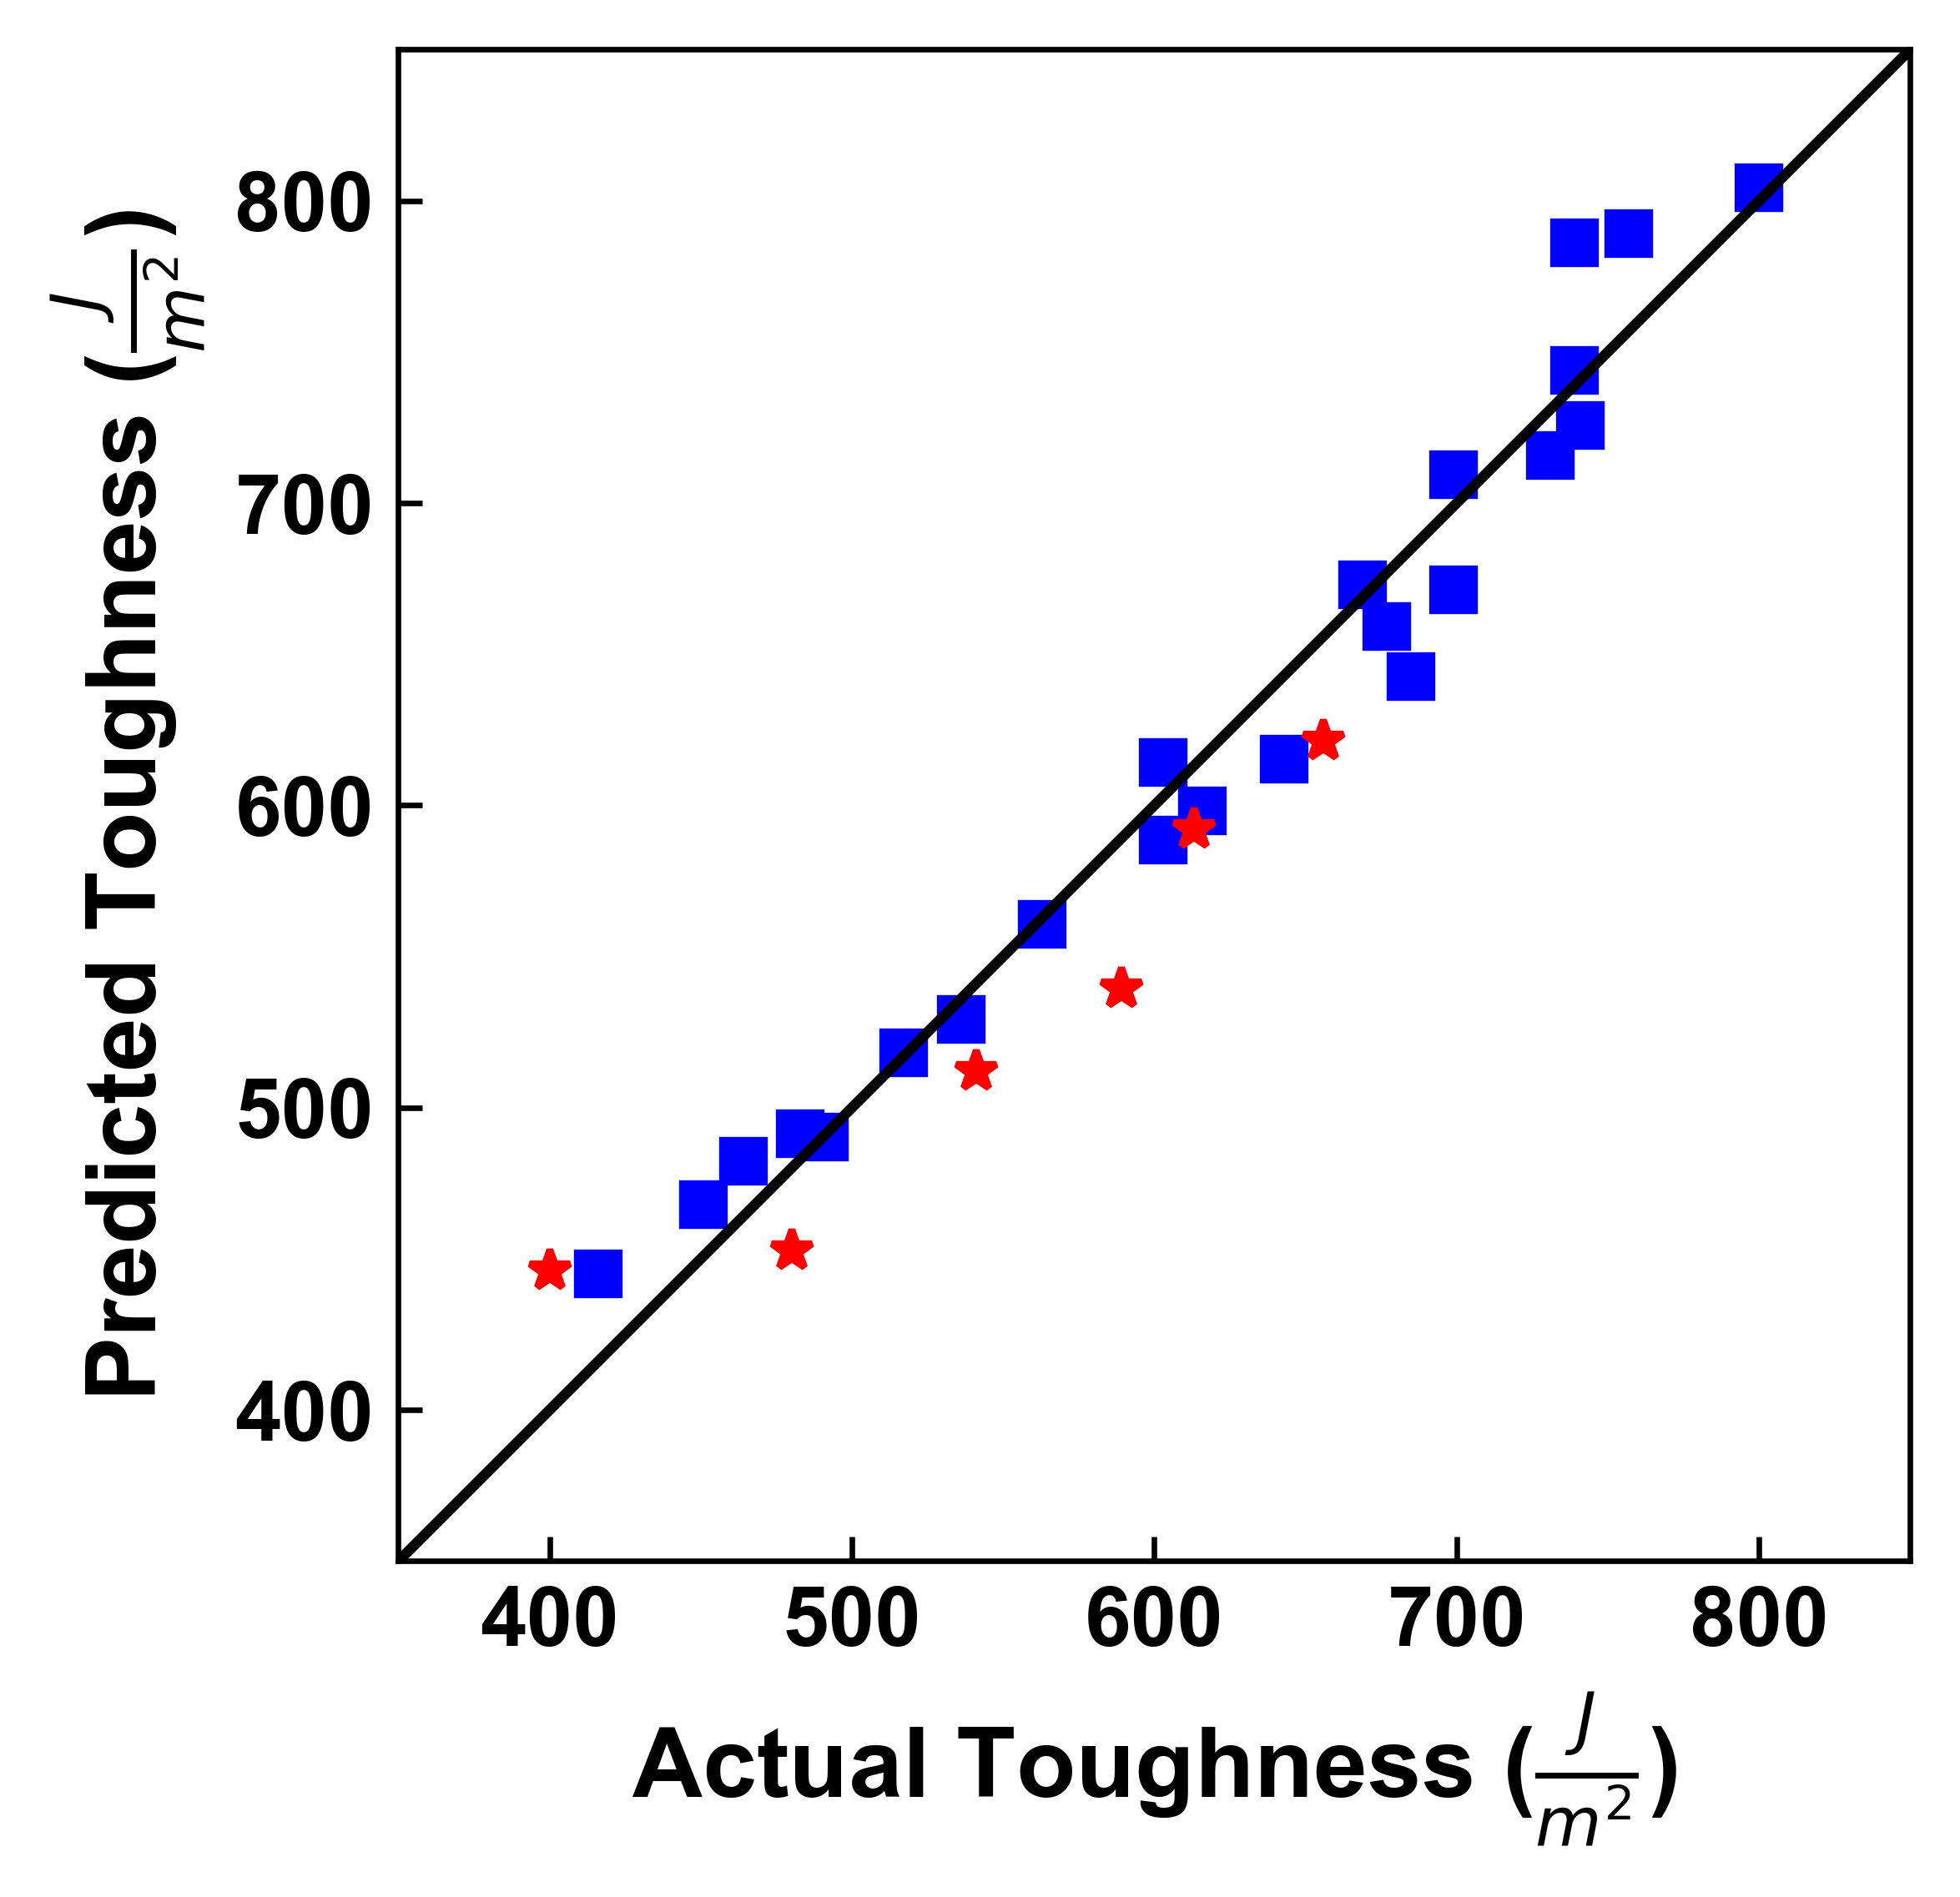

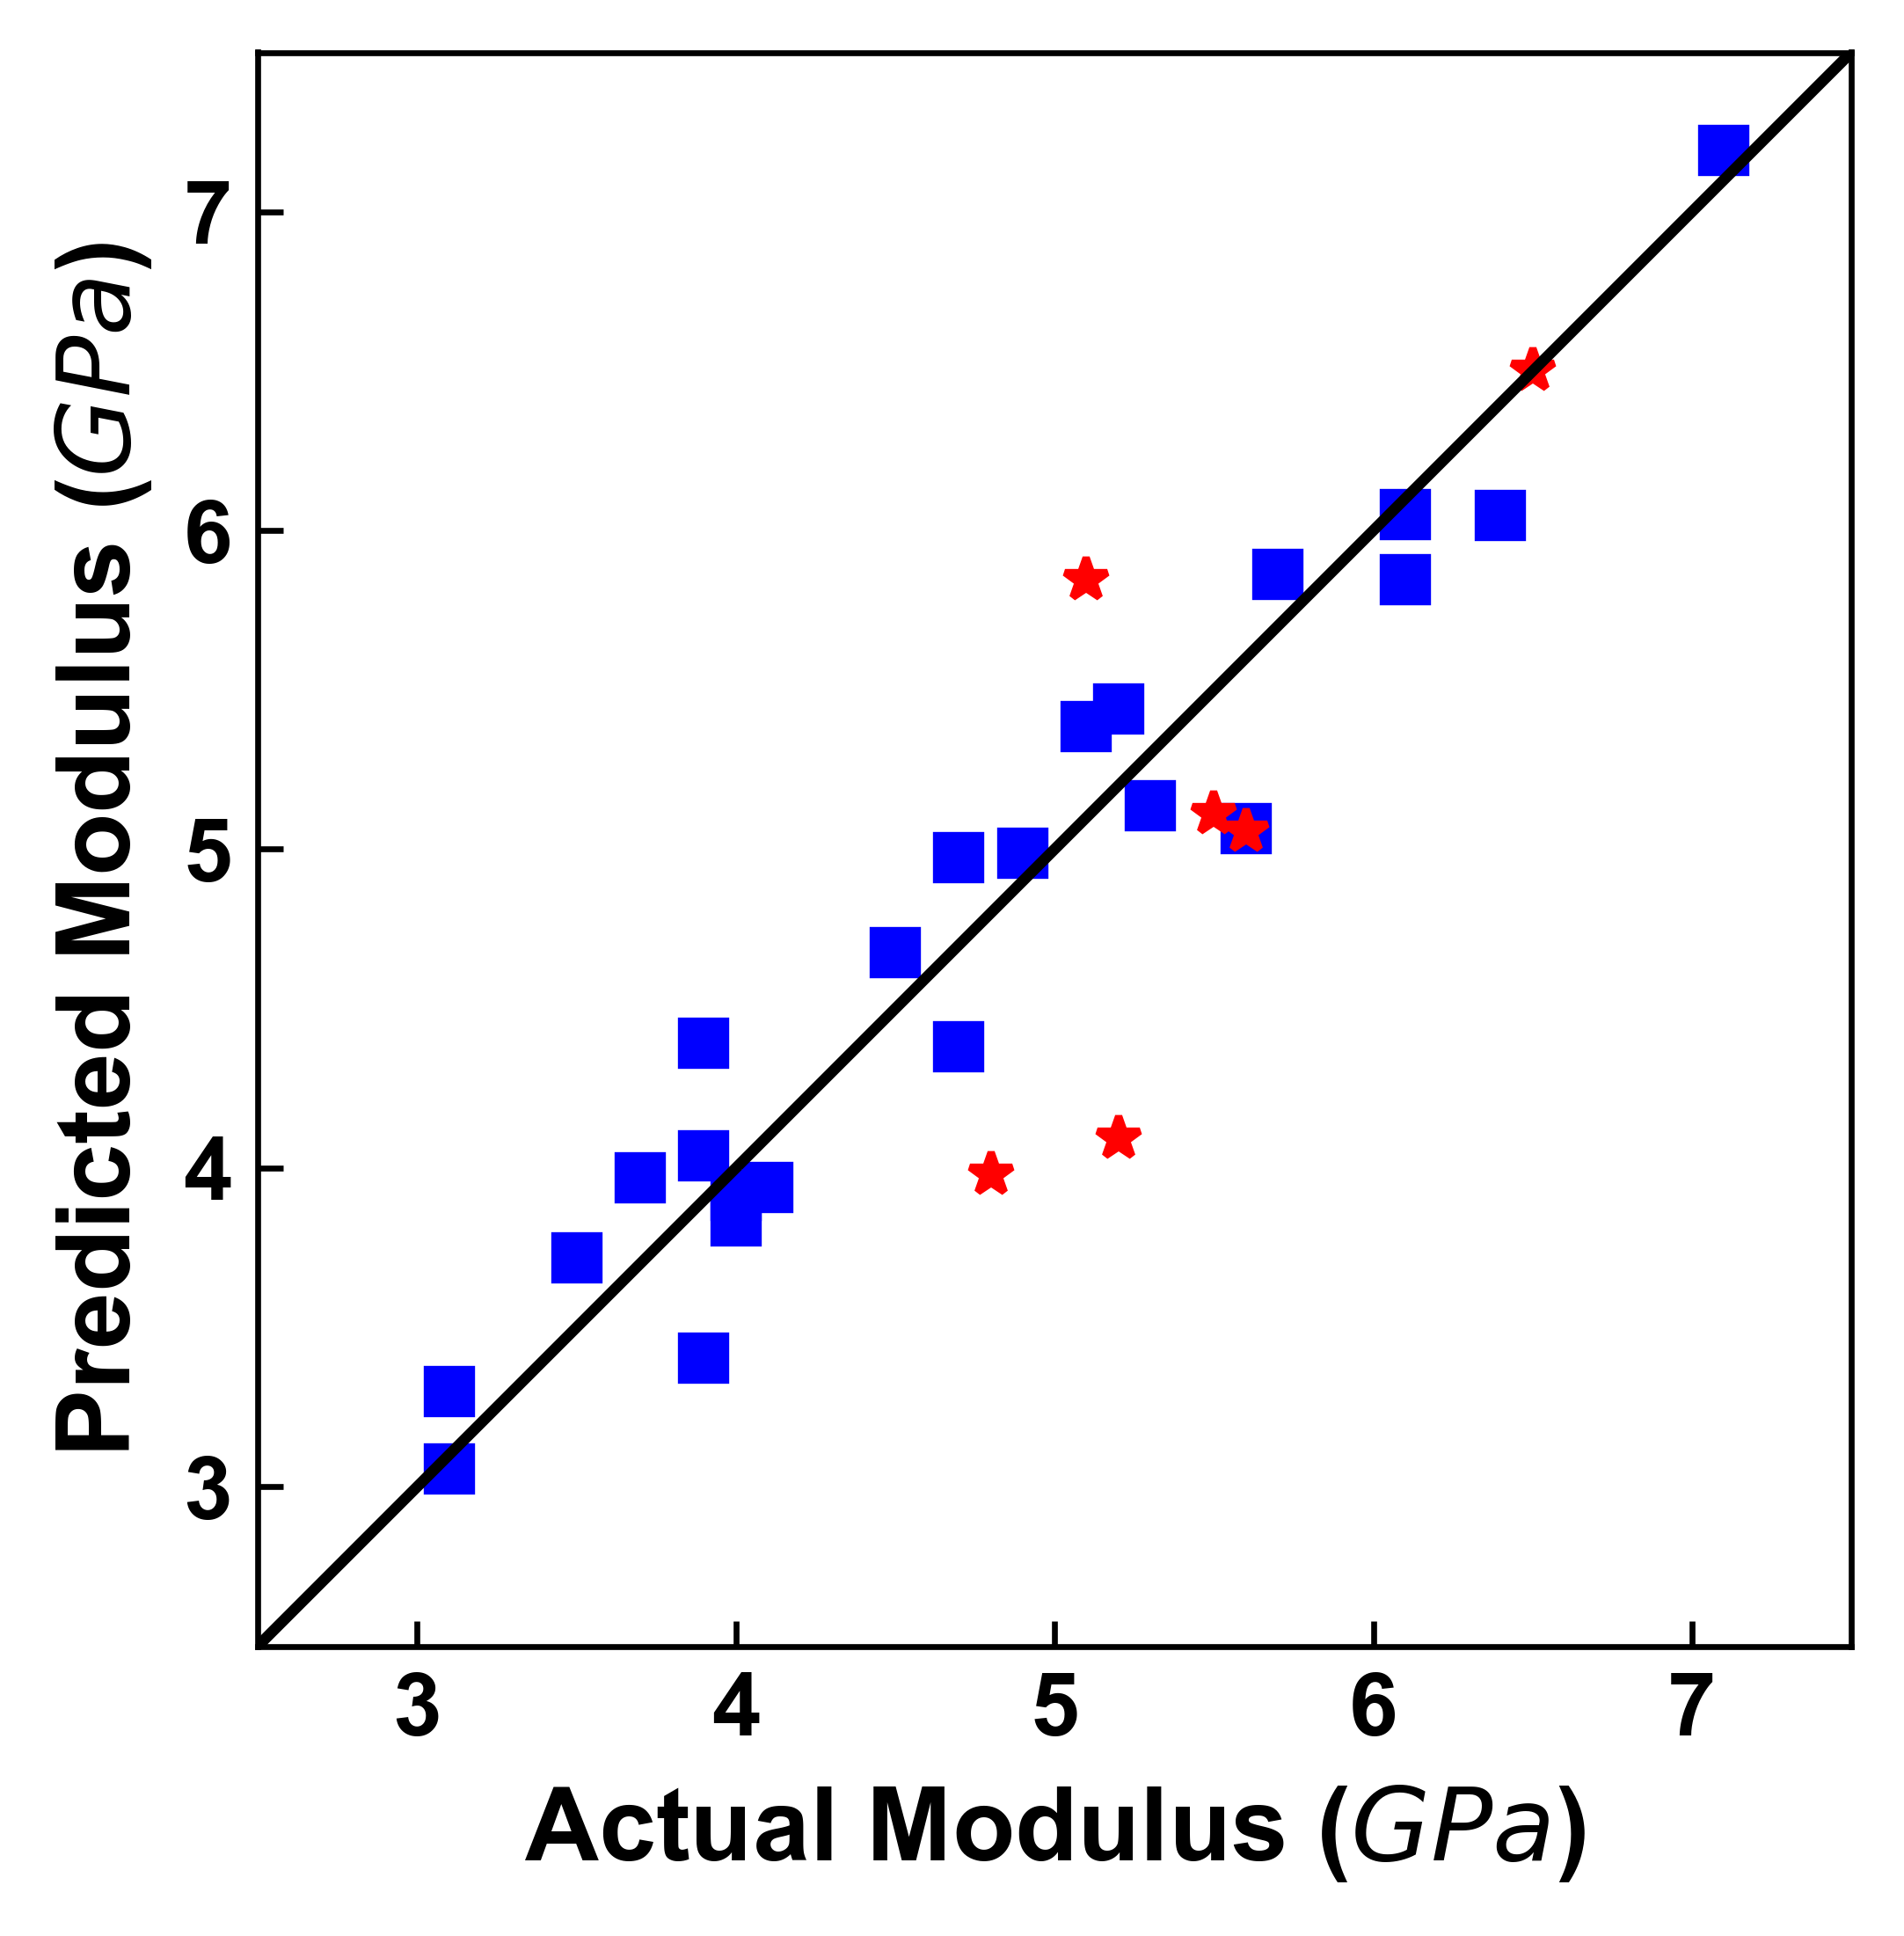

In [14]:

file = 'DATA/testing_inputs.xlsx' # Input correct file name here and the rest of the code should run

df = pd.read_excel(file)

X_test = df[design]
y_test = df[performance]

y_test_pred_LR = reg.predict(X_test)
y_test_pred_LR = pd.DataFrame(data = y_test_pred_LR,
                          columns = performance)

nn = 0
r2_tough = r2_score(y_test_pred_LR[performance[nn]],y_test[performance[nn]])
mape_tough = mape(y_test_pred_LR[performance[nn]],y_test[performance[nn]])

nn = 1
r2_mod = r2_score(y_test_pred_LR[performance[nn]],y_test[performance[nn]])
mape_mod = mape(y_test_pred_LR[performance[nn]],y_test[performance[nn]])

df_metrics = pd.DataFrame({
f'R^2 for {performance[0]}':[r2_tough],
f'R^2 for {performance[1]}':[r2_mod],
f'MAPE for {performance[0]}':[mape_tough],
f'MAPE for {performance[1]}':[mape_mod]
})

print(df_metrics.T)

# Plotting Toughness with Training and Testing
fig,ax = plt.subplots(dpi=dpi)
nn = 0
ax.plot(y[performance[nn]],y_pred_LR[performance[nn]],'sb')
ax.plot(y_test[performance[nn]],y_test_pred_LR[performance[nn]],'*r')
low = 350
high = 850
ax.plot([low,high],[low,high],'k-')
ax.set_xlim([low,high])
ax.set_ylim([low,high])
ax.set_xlabel(r'Actual Toughness ($\frac{J}{m^2}$)',
             fontsize=med,
             fontweight="bold",
             fontname=fontname)
ax.set_ylabel(r'Predicted Toughness ($\frac{J}{m^2}$)',
             fontsize=med,
             fontweight="bold",
             fontname=fontname)
ax.tick_params(axis='both',
               labelsize=sml,
               direction = 'in')
plt.xticks(fontweight="bold",
           fontname=fontname)
plt.yticks(fontweight="bold",
           fontname=fontname)
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
plt.savefig('FIGURES/LR_training_testing_toughness_parity.svg')
plt.show()

# Plotting Modulus with Training and Testing
fig,ax = plt.subplots(dpi=dpi)
nn = 1
ax.plot(y[performance[nn]],y_pred_LR[performance[nn]],'sb')
ax.plot(y_test[performance[nn]],y_test_pred_LR[performance[nn]],'*r')
low = 2.5
high = 7.5
ax.plot([low,high],[low,high],'k-')
ax.set_xlim([low,high])
ax.set_ylim([low,high])
ax.set_xlabel(r'Actual Modulus ($GPa$)',
             fontsize=med,
             fontweight="bold",
             fontname=fontname)
ax.set_ylabel(r'Predicted Modulus ($GPa$)',
             fontsize=med,
             fontweight="bold",
             fontname=fontname)
ax.tick_params(axis='both',
               labelsize=sml,
               direction = 'in')
plt.xticks(fontweight="bold",
           fontname=fontname)
plt.yticks(fontweight="bold",
           fontname=fontname)
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
plt.savefig('FIGURES/LR_training_testing_modulus_parity.svg')
plt.show()

# Linear Regression -- Scheffe Model (Quadratic)

Could be run as an independent script

### Import necessary Packages:

In [15]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_percentage_error as mape, r2_score
import matplotlib.pyplot as plt

### Data Import
Read in data from excel file using pandas

In [16]:
file = 'DATA/training_inputs.xlsx'

df = pd.read_excel(file)

design = ['Powdered Additive','Base Resin A','Base Resin B','Stabilizer','Temperature','Screw Speed (RPM)']
performance = ['Toughness (J/m2)','Modulus (GPa)']

X_orig = df[design]

# Quadratic Scheffe model
X_scheffe = X_orig.copy()
for i in range(len(X_orig.columns)):
    for j in range(len(X_orig.columns)):
        if i<j:
            X_scheffe[design[i]+' * '+design[j]] = X_orig[design[i]]*X_orig[design[j]]


# Normalize data
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X_scheffe)
X_scaled = pd.DataFrame(data=X_scaled,
                        columns=X_scheffe.columns)

# Data used
X = X_scaled
y = df[performance]

In [17]:
X.head()

,Powdered Additive,Base Resin A,Base Resin B,Stabilizer,Temperature,Screw Speed (RPM),Powdered Additive * Base Resin A,Powdered Additive * Base Resin B,Powdered Additive * Stabilizer,Powdered Additive * Temperature,...,Base Resin A * Base Resin B,Base Resin A * Stabilizer,Base Resin A * Temperature,Base Resin A * Screw Speed (RPM),Base Resin B * Stabilizer,Base Resin B * Temperature,Base Resin B * Screw Speed (RPM),Stabilizer * Temperature,Stabilizer * Screw Speed (RPM),Temperature * Screw Speed (RPM)
0,-0.214563,-0.021730,0.096602,0.624391,-0.028850,-0.815290,0.024537,-0.022448,0.090265,-0.226215,...,0.938076,0.126603,0.034238,-0.201018,0.306639,0.043461,-0.121220,0.607728,-0.085981,-0.762283
1,-0.214563,-0.721439,0.855281,-0.093659,0.634697,0.434821,-0.722469,0.585749,-0.225398,-0.144089,...,0.192892,-0.649895,-0.714463,-0.640897,0.734493,0.834708,1.060961,0.083683,0.181256,0.619757
2,0.344110,-1.271211,1.343003,-0.811708,1.381187,0.434821,-1.247835,1.568222,-0.103989,0.508574,...,-1.151101,-1.147340,-1.339227,-1.207125,0.762096,1.422163,1.578819,-0.472414,-0.406665,0.879381
3,-0.866347,0.727958,-0.336929,-1.529757,-0.733868,-1.440345,0.178453,-0.697480,-1.281652,-0.896646,...,1.417123,0.035607,0.774040,0.220143,-0.714690,-0.410829,-0.644309,-1.639096,-1.796295,-1.516242
4,-0.866347,2.177356,-1.583330,1.342440,-2.143905,-0.190234,1.309223,-1.427651,-0.358947,-1.024178,...,-0.951498,2.710887,2.009841,1.998379,-1.370273,-1.535845,-1.554484,0.575676,0.876072,-0.855380


In [18]:
y.head()

,Toughness (J/m2),Modulus (GPa)
0,643,5.6
1,603,4.7
2,685,3.9
3,536,5.2
4,491,7.1


### Linear Regression - Scheffe Model

In [19]:
reg = LinearRegression(fit_intercept = True).fit(X,y)

reg.coef_

array([[ 1.92616824e+04,  3.12306227e+04,  3.02976171e+04,
        -2.27348245e+04,  1.55749292e+04,  2.80292787e+04,
        -5.49295682e+02,  1.53620025e+02, -5.38892705e+03,
        -2.28135834e+04,  9.42741822e+03, -3.93767803e+02,
        -1.97926197e+03, -2.48632382e+04,  2.67842234e+03,
        -9.56673271e+03, -3.65529379e+04,  1.32808574e+04,
         2.95419255e+04, -4.02781456e+01, -3.85603026e+04],
       [-1.78773127e+01, -1.44183567e+02, -1.61466502e+02,
         1.14824706e+02,  6.77989295e+00,  2.29797888e+01,
        -8.93437327e+00,  6.46402800e-01,  2.05140018e+01,
         1.09744037e+00,  8.45539793e+00, -3.95131264e-01,
        -2.48246792e+00,  1.30309381e+02,  4.06246937e+00,
         3.35189943e+01,  1.35865348e+02,  1.22823424e+01,
        -1.36293805e+02, -1.27897293e+00, -3.20477431e+01]])

### Linear Regression (Scheffe Model) Metrics

In [20]:
y_pred_LR = reg.predict(X)

y_pred_LR = pd.DataFrame(data=y_pred_LR,
                     columns = performance)

nn = 0
r2_0 = r2_score(y[performance[nn]],y_pred_LR[performance[nn]])
print(f'R^2 for {performance[nn]}: {r2_0}')
nn = 1
r2_1 = r2_score(y[performance[nn]],y_pred_LR[performance[nn]])
print(f'R^2 for {performance[nn]}: {r2_1}')

R^2 for Toughness (J/m2): 0.9995573759275466
R^2 for Modulus (GPa): 0.9997873479650059


### Plotting

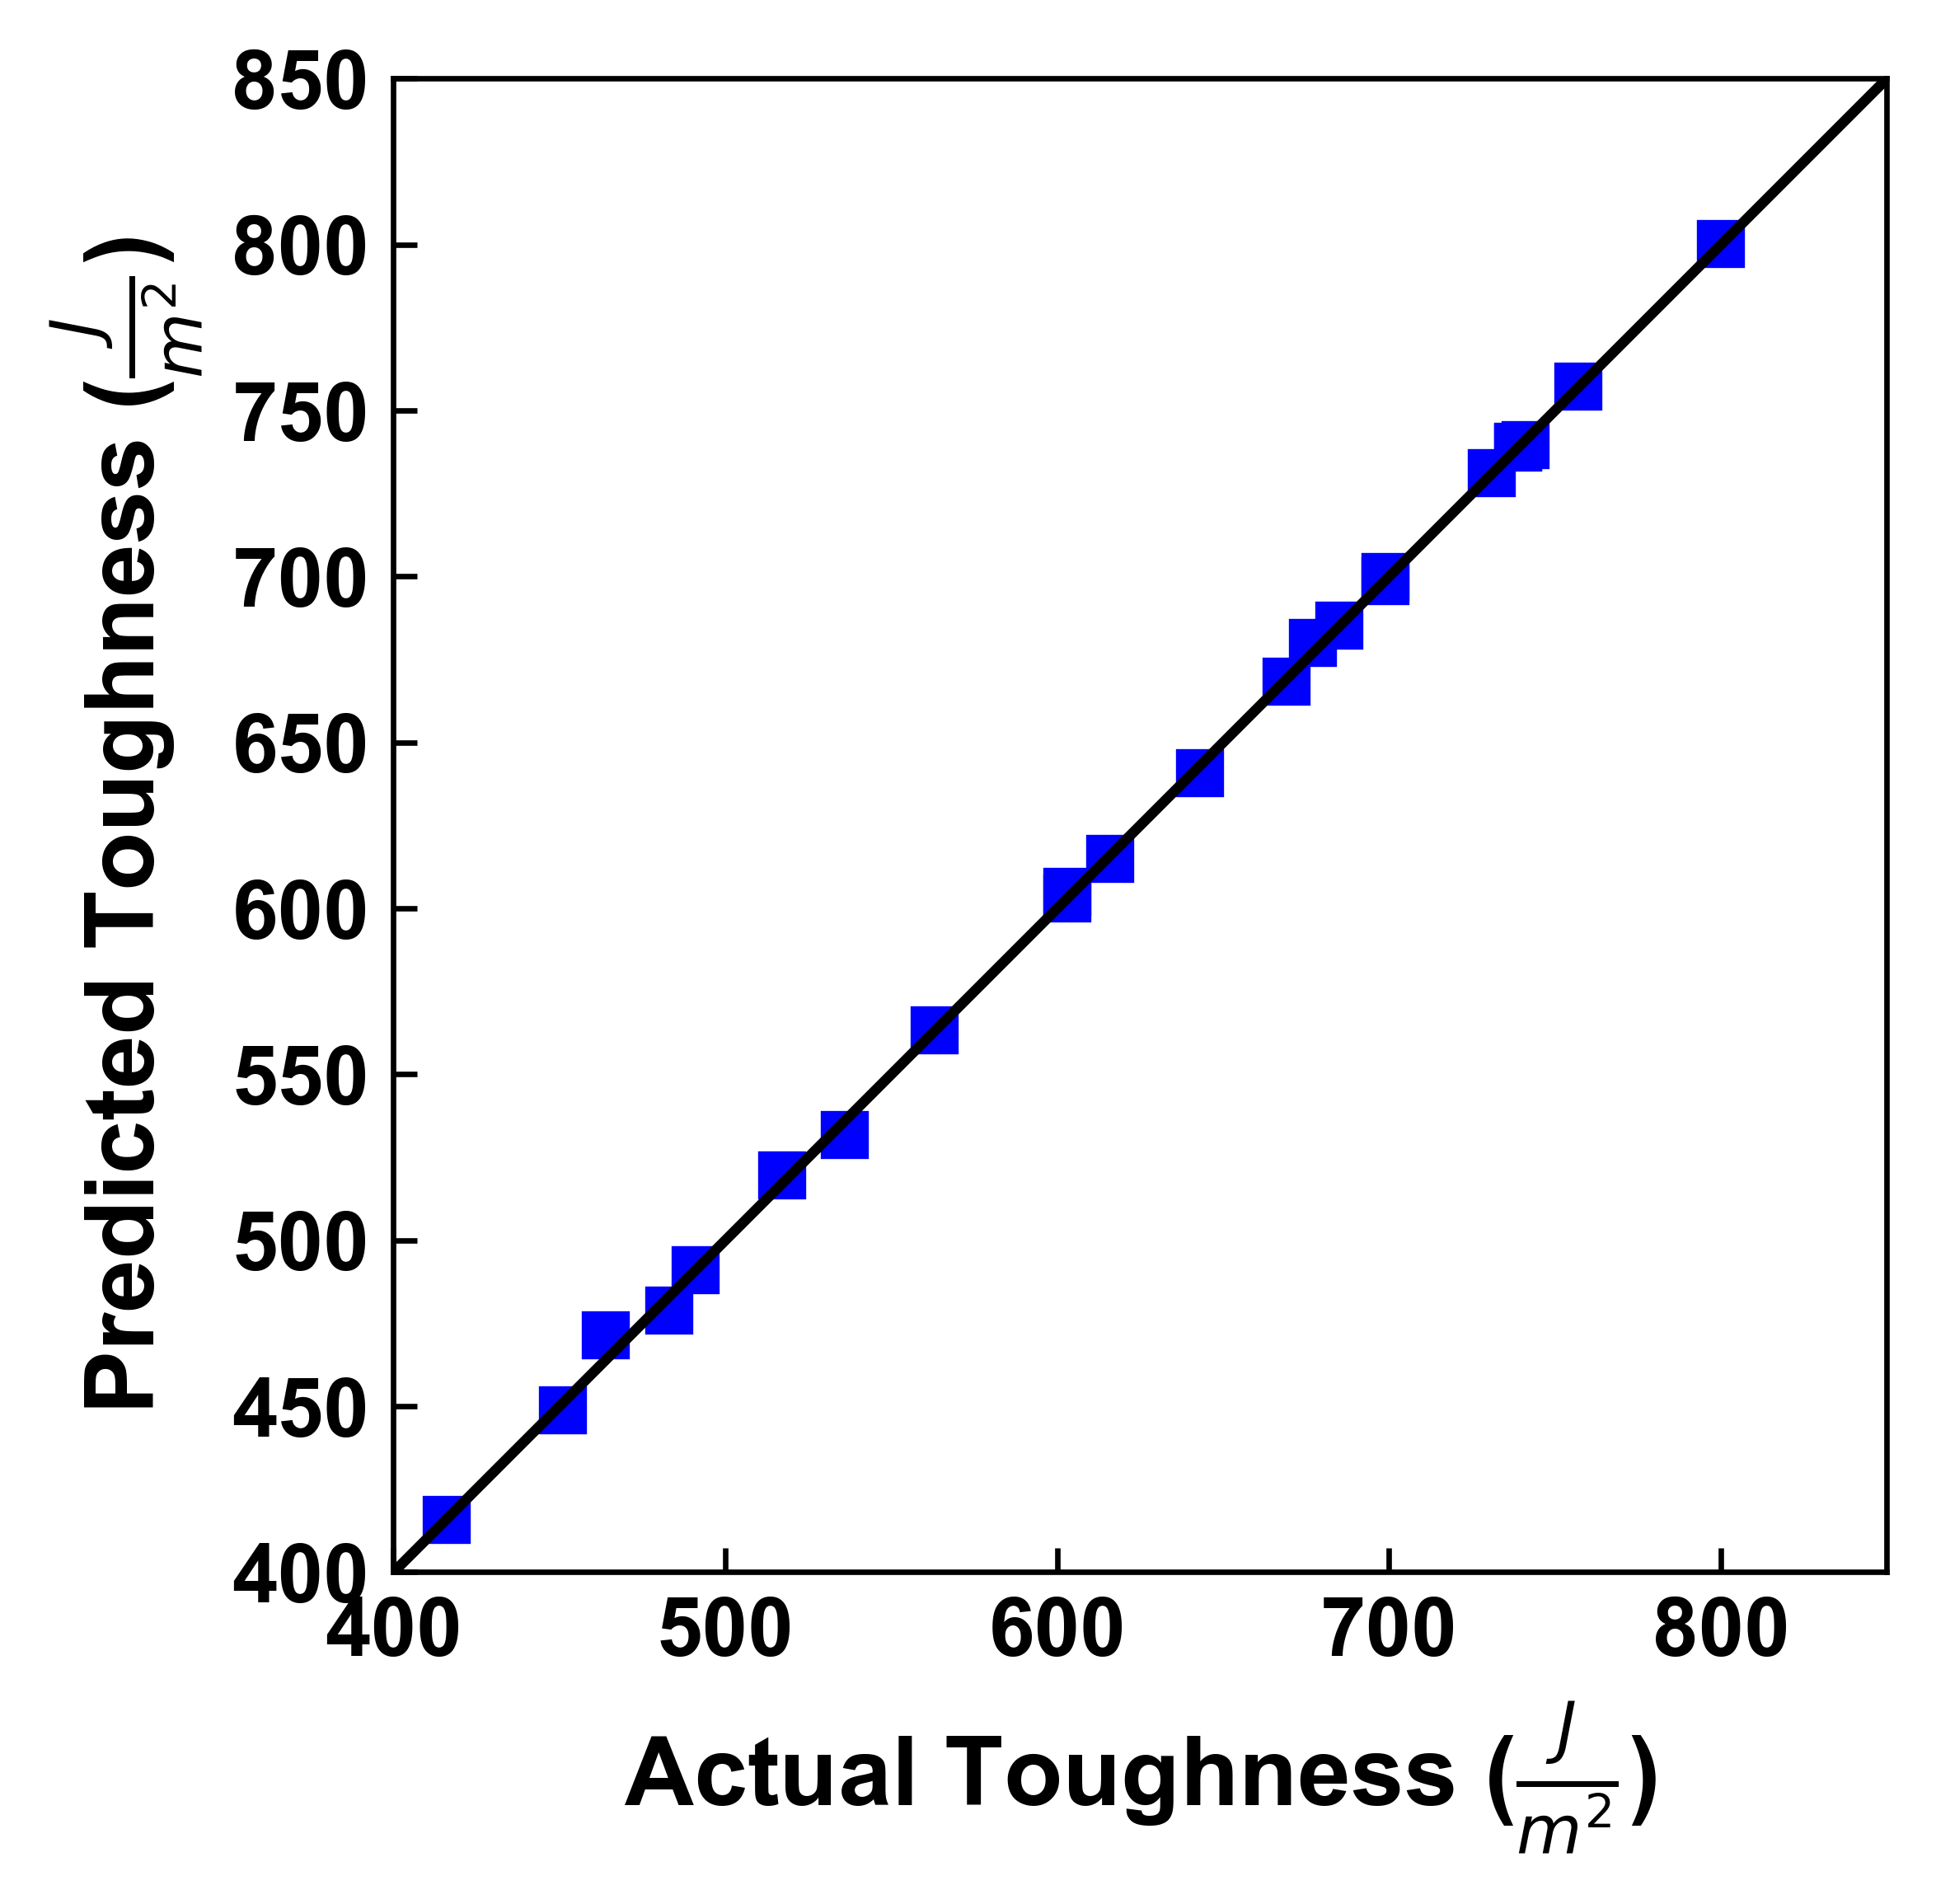

In [21]:
i = 1
dpi = 70
if i == 1:
    dpi = 600
    
lrg = 20
med = 14
sml = 12
fontname = "Arial"

fig,ax = plt.subplots(dpi=dpi)
nn = 0
ax.plot(y[performance[nn]],y_pred_LR[performance[nn]],'bs')
low = 400
high = 850
ax.plot([low,high],[low,high],'k-')
ax.set_xlim([low,high])
ax.set_ylim([low,high])
ax.set_xlabel(r'Actual Toughness ($\frac{J}{m^2}$)',
             fontsize=med,
             fontweight="bold",
             fontname=fontname)
ax.set_ylabel(r'Predicted Toughness ($\frac{J}{m^2}$)',
             fontsize=med,
             fontweight="bold",
             fontname=fontname)
ax.tick_params(axis='both',
               labelsize=sml,
               direction = 'in')
plt.xticks(fontweight="bold",
           fontname=fontname)
plt.yticks(fontweight="bold",
           fontname=fontname)
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
plt.savefig('FIGURES/ScheffeQR_training_toughness_parity.svg')
plt.show()

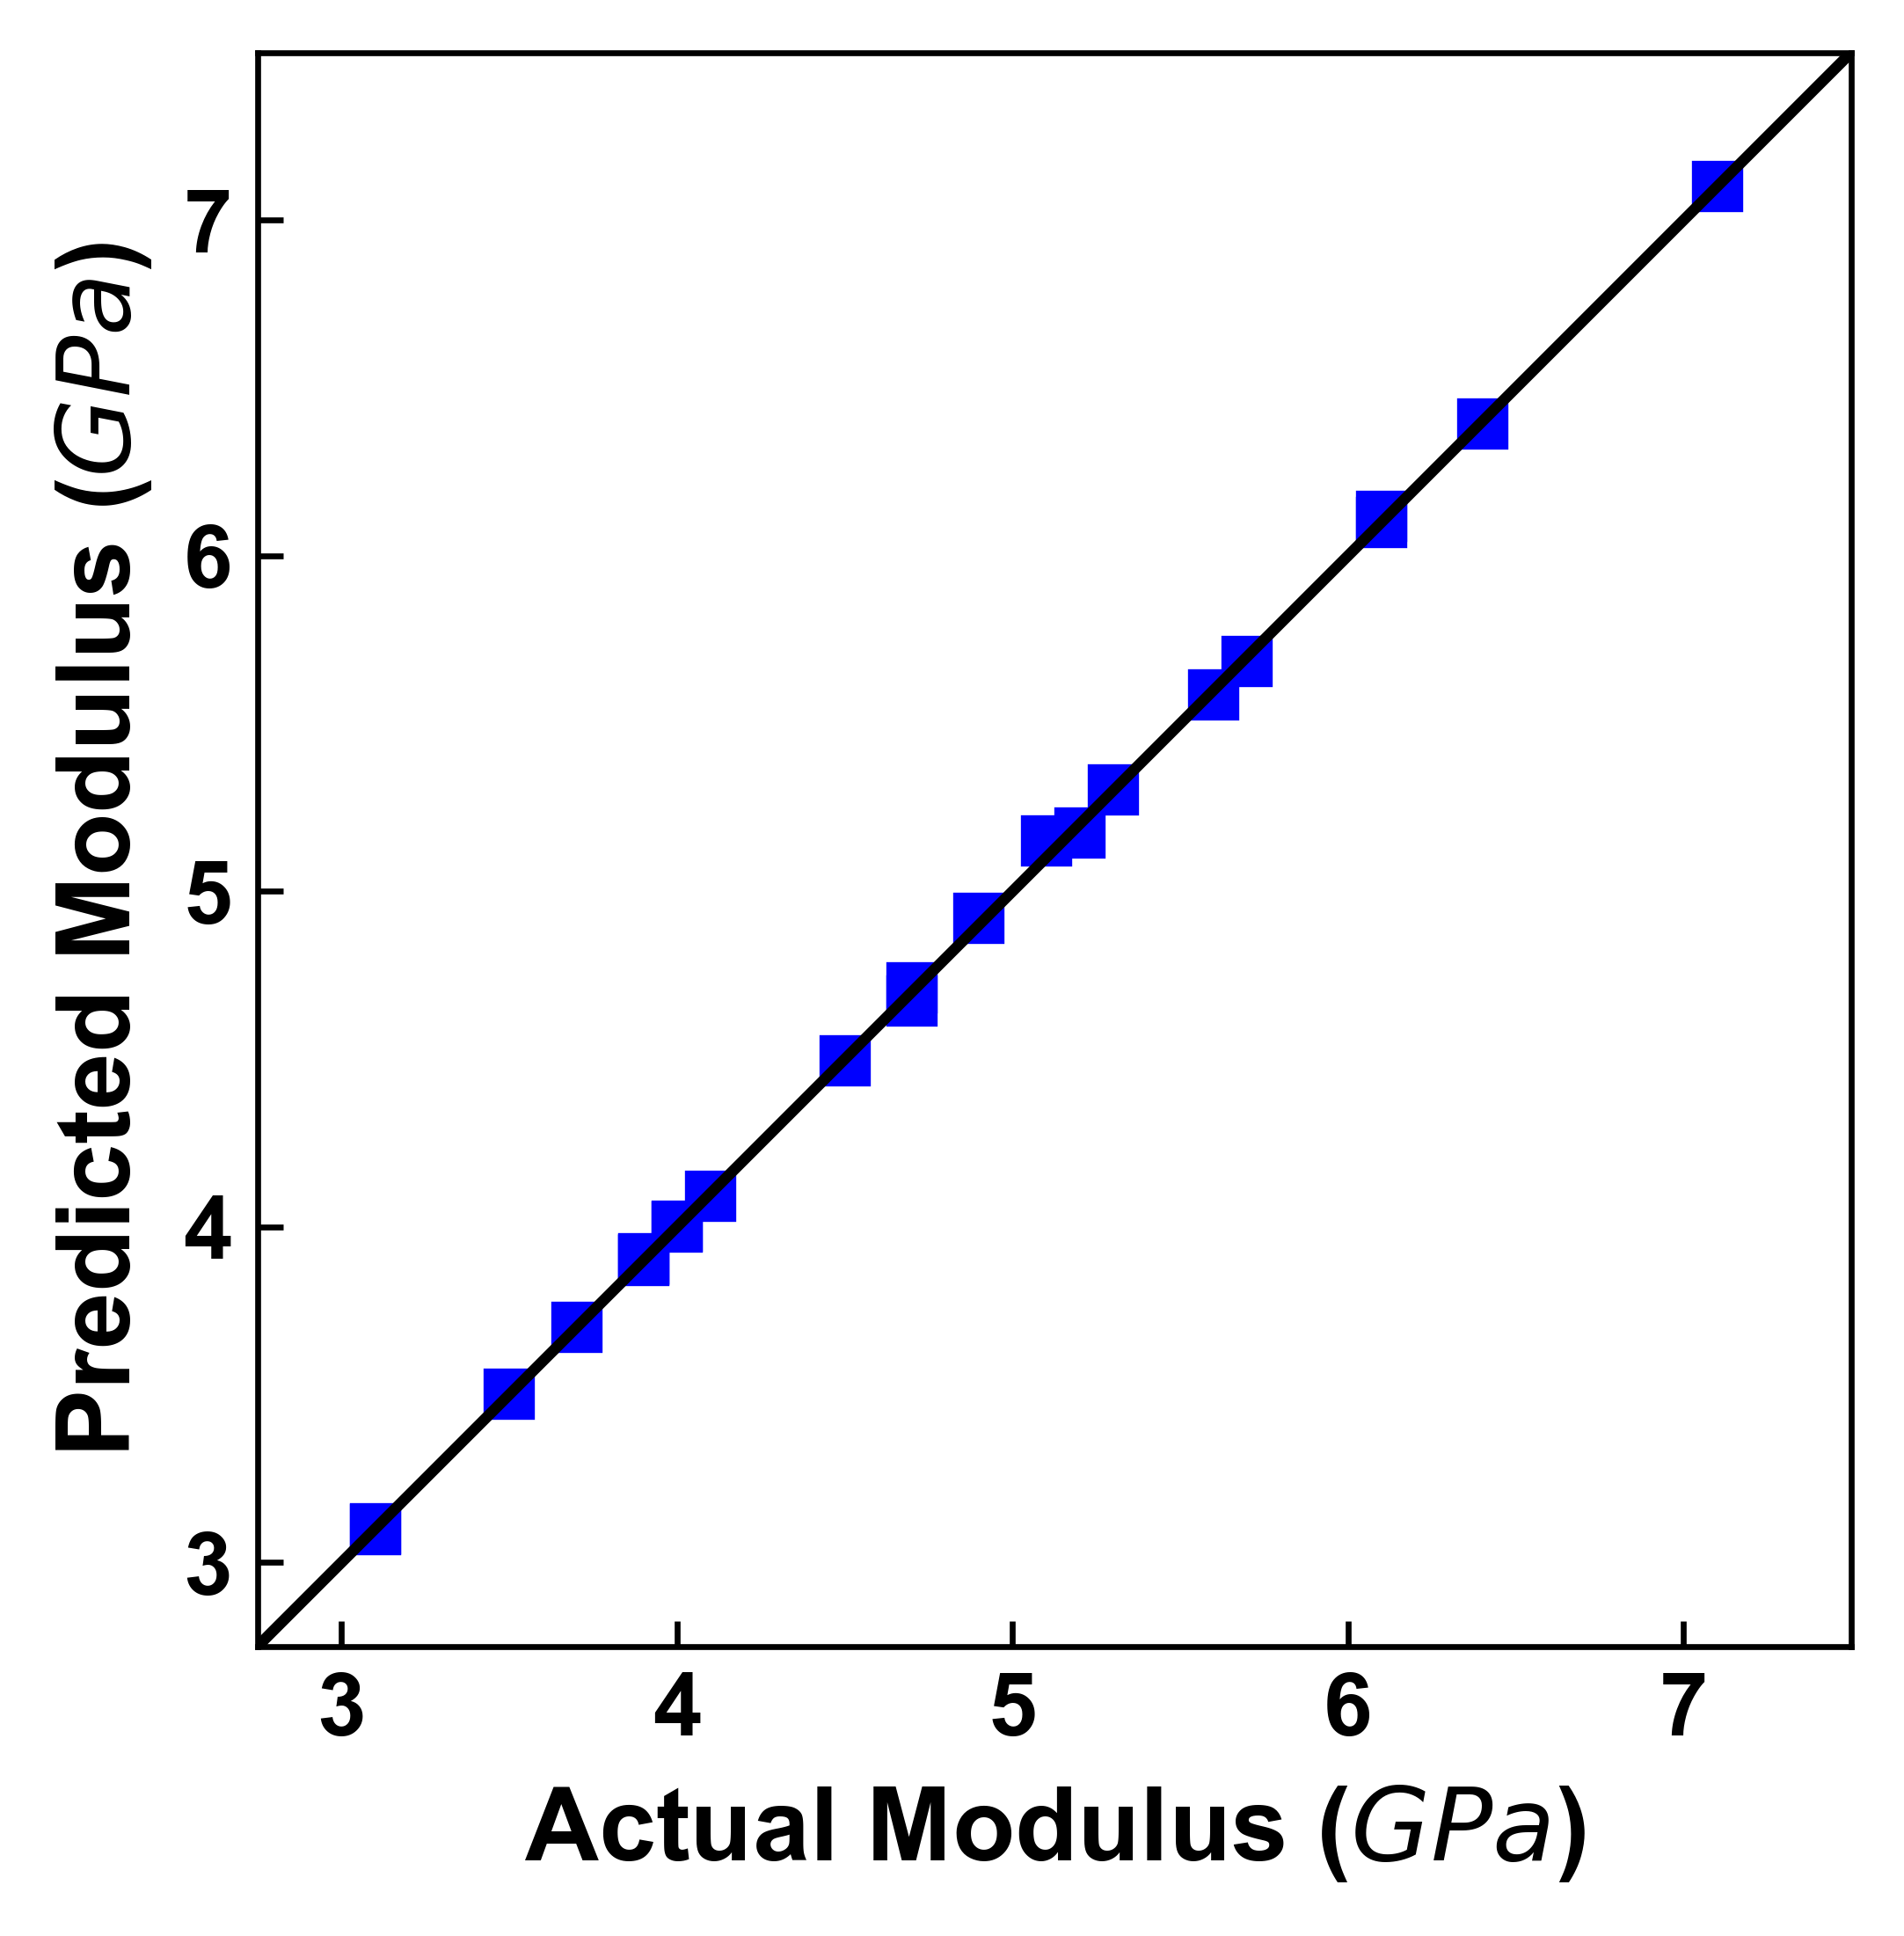

In [22]:
fig,ax = plt.subplots(dpi=dpi)
nn = 1
ax.plot(y[performance[nn]],y_pred_LR[performance[nn]],'bs')
low = 2.75
high = 7.5
ax.plot([low,high],[low,high],'k-')
ax.set_xlim([low,high])
ax.set_ylim([low,high])
ax.set_xlabel(r'Actual Modulus ($GPa$)',
             fontsize=med,
             fontweight="bold",
             fontname=fontname)
ax.set_ylabel(r'Predicted Modulus ($GPa$)',
             fontsize=med,
             fontweight="bold",
             fontname=fontname)
ax.tick_params(axis='both',
               labelsize=sml,
               direction = 'in')
plt.xticks(fontweight="bold",
           fontname=fontname)
plt.yticks(fontweight="bold",
           fontname=fontname)
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
plt.savefig('FIGURES/ScheffeQR_training_modulus_parity.svg')
plt.show()

### KFold Validation

In [23]:
k = 5 
kf = KFold(n_splits=k,shuffle=True,random_state=1743)

model = LinearRegression()
mape_scores_tough = []
mape_scores_mod = []
r2_scores_mod = []
r2_scores_tough = []

for train_index, test_index in kf.split(X):
    # Splitting into training and testing arrays
    X_train, X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index,:],y.iloc[test_index,:]
    
    # Train the model
    model.fit(X_train,y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    y_pred = pd.DataFrame(data = y_pred,
                          columns = performance)
    # Metric for validation
    mape_tough = mape(y_test[performance[0]],y_pred[performance[0]])
    mape_mod = mape(y_test[performance[1]],y_pred[performance[1]])
    #Append to list of MSE
    mape_scores_tough.append(mape_tough)
    mape_scores_mod.append(mape_mod)
    
    r2_tough = r2_score(y_test[[performance[0]]],y_pred[performance[0]])
    r2_mod = r2_score(y_test[performance[1]],y_pred[performance[1]])
    
    r2_scores_tough.append(r2_tough)
    r2_scores_mod.append(r2_mod)

### Make a table of the scores

In [24]:
# Make a table
df_scores = pd.DataFrame({
    'MAPE Toughness':mape_scores_tough,
    'MAPE Modulus':mape_scores_mod,
    'R2 Toughness':r2_scores_tough,
    'R2 Modulus':r2_scores_mod})

df_scores

,MAPE Toughness,MAPE Modulus,R2 Toughness,R2 Modulus
0,0.054724,0.079505,0.666323,0.539792
1,0.085248,0.110348,0.488861,0.535922
2,0.071499,0.113283,0.755154,0.726308
3,1.804996,0.645243,-180.950723,-4.070153
4,0.089065,0.118993,0.827450,0.557665


### Export to Excel

In [25]:
df_scores.to_excel('ANALYSIS/ScheffeModel_KFold.xlsx',index=False)

### Leave One Out Validation

In [26]:
k = len(X) # Dataset size to do Leave one Out validation
kf = KFold(n_splits=k,shuffle=True,random_state=1743)

model = LinearRegression()

mape_scores_tough = []
mape_scores_mod = []
r2_scores_tough = []
r2_scores_mod = []

for train_index, test_index in kf.split(X):
    # Splitting into training and testing arrays
    X_train, X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index,:],y.iloc[test_index,:]
    
    # Train the model
    model.fit(X_train,y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    y_pred = pd.DataFrame(data = y_pred,
                          columns = performance)
    # Metric for validation
    mape_tough = mape(y_test[performance[0]],y_pred[performance[0]])
    mape_mod = mape(y_test[performance[1]],y_pred[performance[1]])
    #Append to list of MSE
    mape_scores_tough.append(mape_tough)
    mape_scores_mod.append(mape_mod)

### Make a Table

In [27]:
df_scores = pd.DataFrame({
    'MAPE Toughness':mape_scores_tough,
    'MAPE Modulus':mape_scores_mod,})  

df_scores

,MAPE Toughness,MAPE Modulus
0,0.221613,0.265211
1,0.061936,0.057137
2,0.055765,0.038380
3,2.173001,3.316396
4,0.104637,0.089637
5,0.062319,0.042762
6,0.601025,0.904882
7,0.193634,0.124442
8,0.117472,0.141760
9,0.670458,0.475541


### Export to Excel

In [28]:
df_scores.to_excel('ANALYSIS/ScheffeModel_LOO.xlsx',index=False)

### INPUT TEST SET FOR SCHEFFE MODEL

Below is the code for importing test data to compare against the predictions for linear regression. In this case we use the linear regression model 'reg' which was trained on all available data.

The code below must be converted from a "raw NBConvert" to a "cell" to be run after the file name is input.

                                  0
R^2 for Toughness (J/m2)   0.163071
R^2 for Modulus (GPa)      0.033714
MAPE for Toughness (J/m2)  0.244535
MAPE for Modulus (GPa)     0.121258


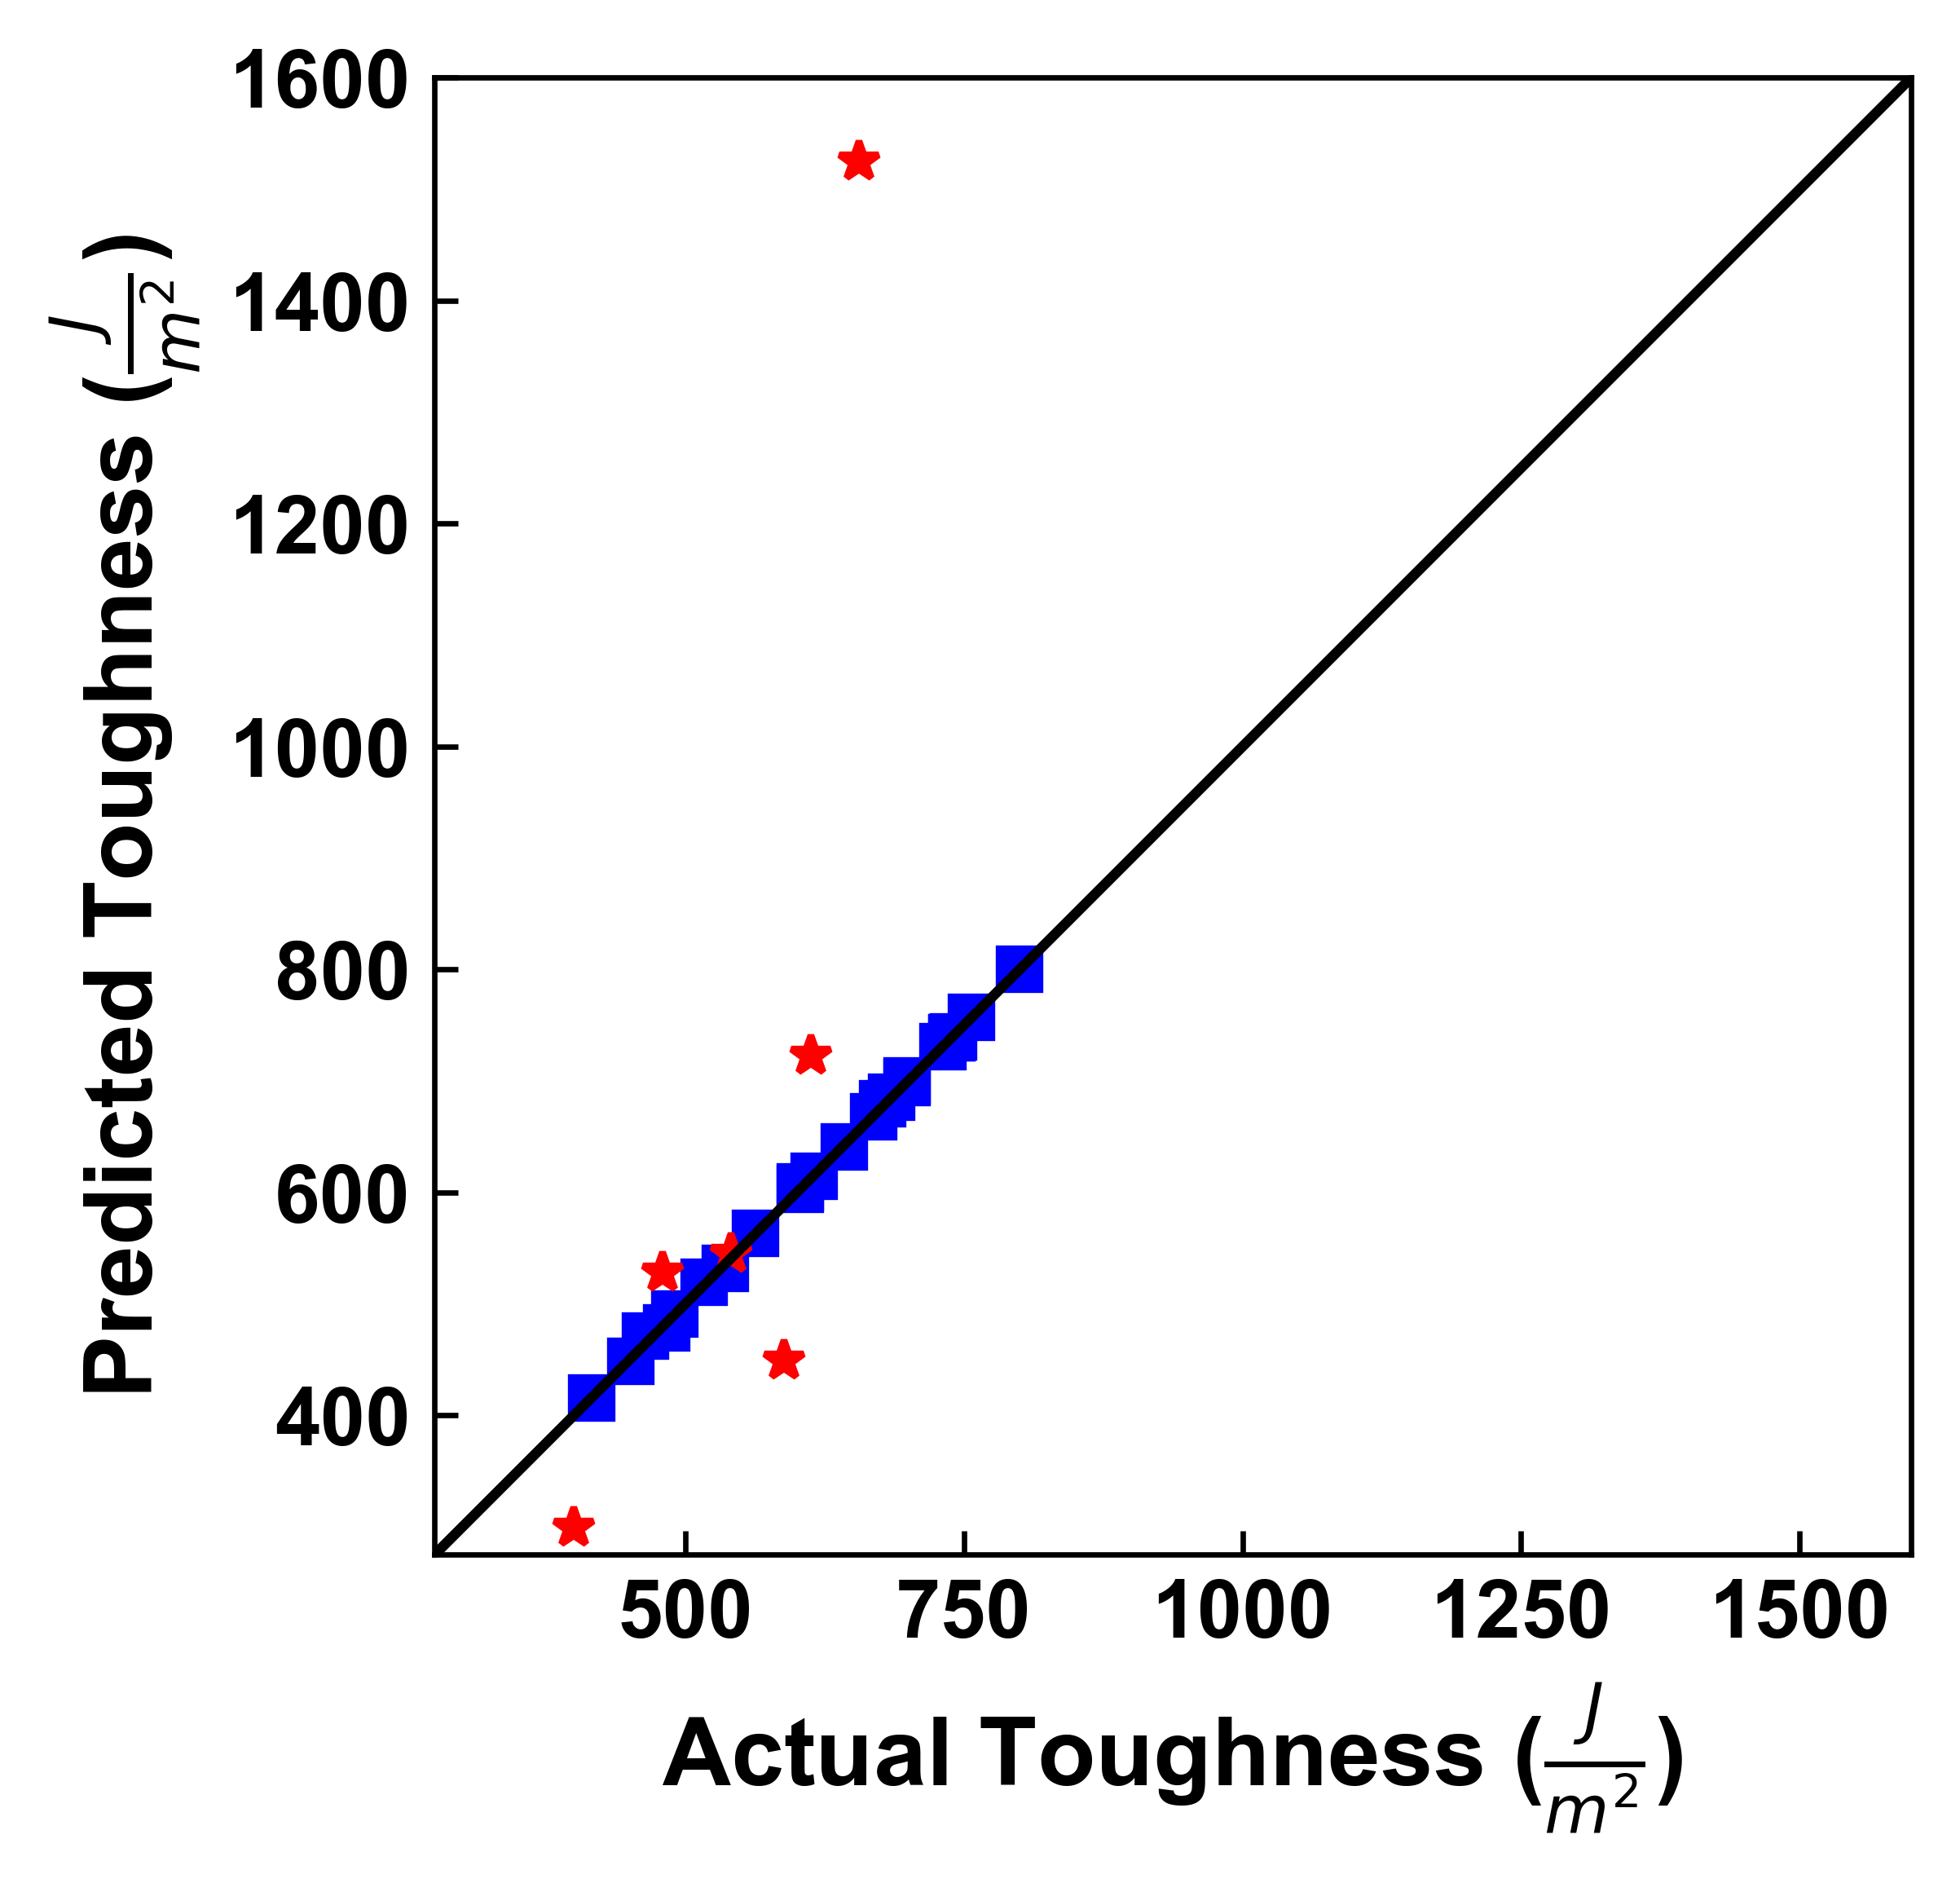

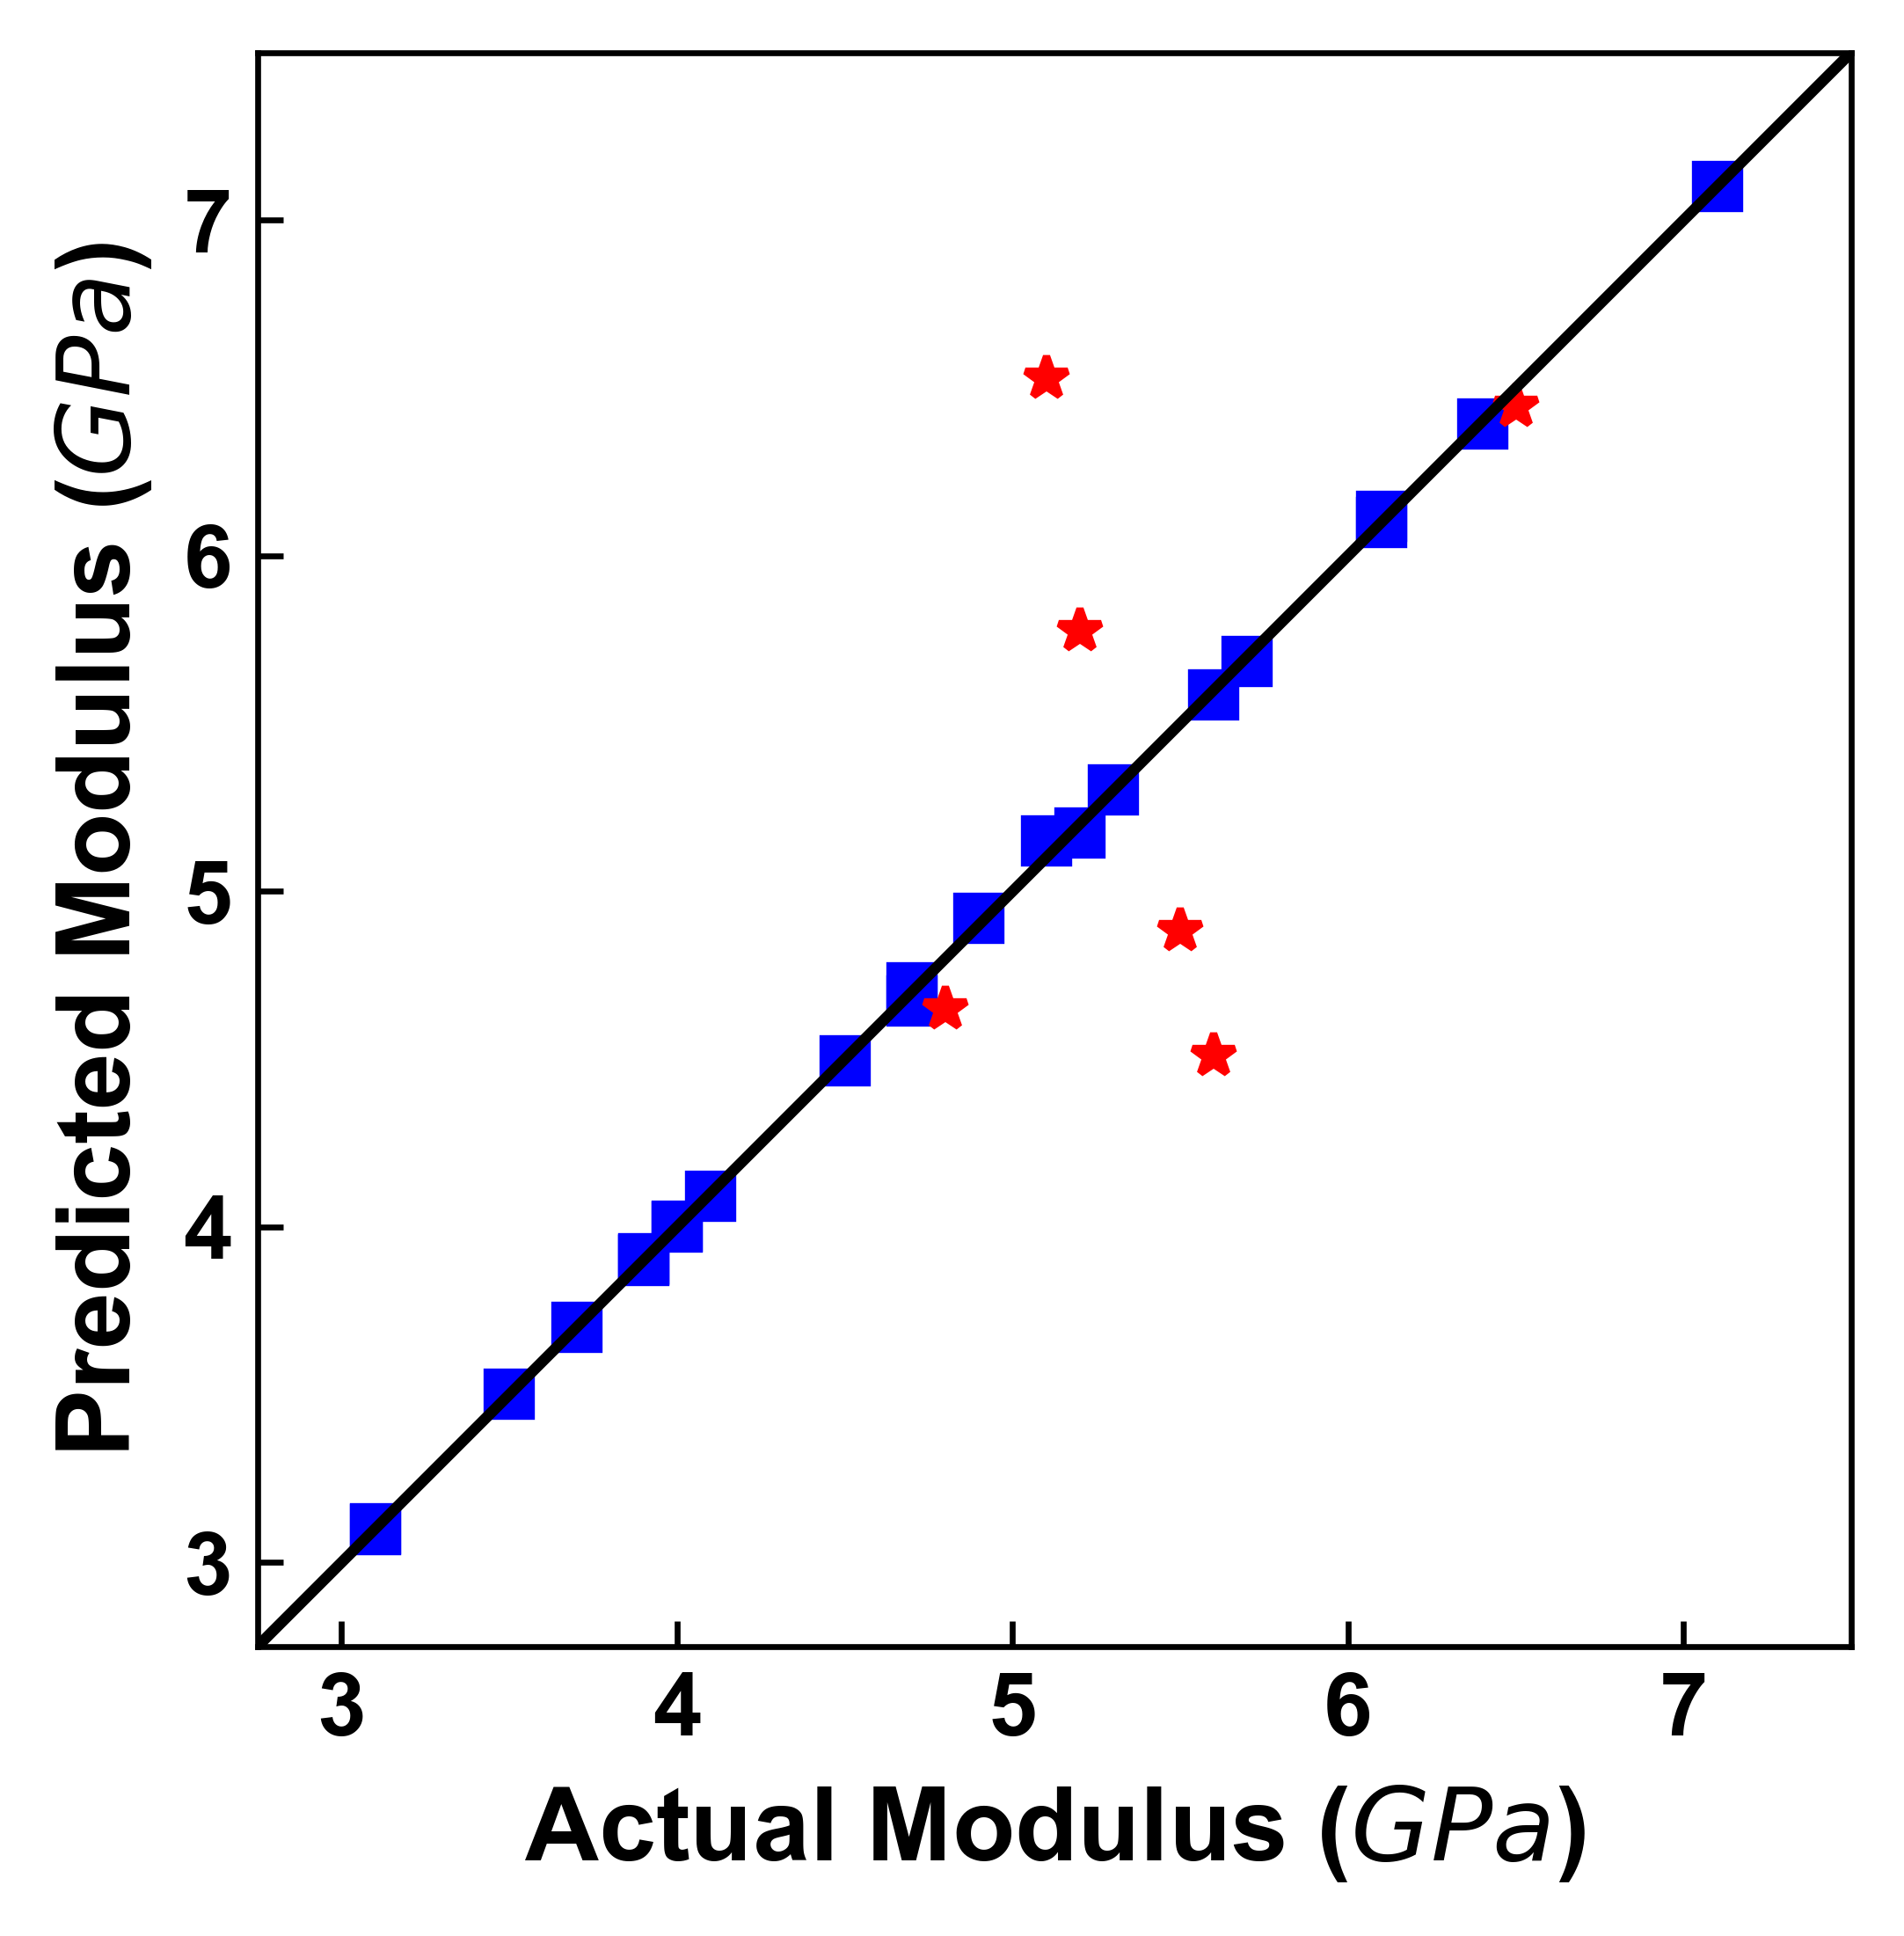

,Toughness (J/m2),Modulus (GPa)
0,449.573772,4.511300
1,528.463306,5.777211
2,722.478378,4.883641
3,545.412053,4.648164
4,1525.151590,6.529750
5,299.429766,6.445368


In [29]:
file = 'DATA/testing_inputs.xlsx' # Input correct file name here and the rest of the code should run

df = pd.read_excel(file)

X_orig = df[design]

# Quadratic Scheffe model
X_scheffe = X_orig.copy()
for i in range(len(X_orig.columns)):
    for j in range(len(X_orig.columns)):
        if i<j:
            X_scheffe[design[i]+' * '+design[j]] = X_orig[design[i]]*X_orig[design[j]]

X_scaled = scaler.transform(X_scheffe)
X_scaled = pd.DataFrame(data=X_scaled,
                        columns=X_scheffe.columns)

# Data used
X_test = X_scaled
y_test = df[performance]


y_test_pred_LR = reg.predict(X_test)
y_test_pred_LR = pd.DataFrame(data = y_test_pred_LR,
                          columns = performance)

nn = 0
r2_tough = r2_score(y_test_pred_LR[performance[nn]],y_test[performance[nn]])
mape_tough = mape(y_test_pred_LR[performance[nn]],y_test[performance[nn]])

nn = 1
r2_mod = r2_score(y_test_pred_LR[performance[nn]],y_test[performance[nn]])
mape_mod = mape(y_test_pred_LR[performance[nn]],y_test[performance[nn]])

df_metrics = pd.DataFrame({
f'R^2 for {performance[0]}':[r2_tough],
f'R^2 for {performance[1]}':[r2_mod],
f'MAPE for {performance[0]}':[mape_tough],
f'MAPE for {performance[1]}':[mape_mod]
})

print(df_metrics.T)

# Plotting Toughness with Training and Testing
fig,ax = plt.subplots(dpi=dpi)
nn = 0
ax.plot(y[performance[nn]],y_pred_LR[performance[nn]],'sb')
ax.plot(y_test[performance[nn]],y_test_pred_LR[performance[nn]],'*r')
low = 275
high = 1600
ax.plot([low,high],[low,high],'k-')
ax.set_xlim([low,high])
ax.set_ylim([low,high])
ax.set_xlabel(r'Actual Toughness ($\frac{J}{m^2}$)',
             fontsize=med,
             fontweight="bold",
             fontname=fontname)
ax.set_ylabel(r'Predicted Toughness ($\frac{J}{m^2}$)',
             fontsize=med,
             fontweight="bold",
             fontname=fontname)
ax.tick_params(axis='both',
               labelsize=sml,
               direction = 'in')
plt.xticks(fontweight="bold",
           fontname=fontname)
plt.yticks(fontweight="bold",
           fontname=fontname)
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
plt.savefig('FIGURES/ScheffeQR_training_testing_toughness_parity.svg')
plt.show()

# Plotting Modulus with Training and Testing
fig,ax = plt.subplots(dpi=dpi)
nn = 1
ax.plot(y[performance[nn]],y_pred_LR[performance[nn]],'sb')
ax.plot(y_test[performance[nn]],y_test_pred_LR[performance[nn]],'*r')
low = 2.75
high = 7.5
ax.plot([low,high],[low,high],'k-')
ax.set_xlim([low,high])
ax.set_ylim([low,high])
ax.set_xlabel(r'Actual Modulus ($GPa$)',
             fontsize=med,
             fontweight="bold",
             fontname=fontname)
ax.set_ylabel(r'Predicted Modulus ($GPa$)',
             fontsize=med,
             fontweight="bold",
             fontname=fontname)
ax.tick_params(axis='both',
               labelsize=sml,
               direction = 'in')
plt.xticks(fontweight="bold",
           fontname=fontname)
plt.yticks(fontweight="bold",
           fontname=fontname)
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
plt.savefig('FIGURES/ScheffeQR_training_testing_modulus_parity.svg')
plt.show()
y_test_pred_LR

# Gaussian Process Regression

Could be run as an independent script

In [30]:
# Suppress Warnings
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

import os
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = "ignore" 

### Import new packages for GPR

In [31]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel as C, RBF, WhiteKernel
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_percentage_error as mape, r2_score
import matplotlib.pyplot as plt

### Import data

In [32]:
file = 'DATA/training_inputs.xlsx'

df = pd.read_excel(file)

design = ['Powdered Additive','Base Resin A','Base Resin B','Stabilizer','Temperature','Screw Speed (RPM)']
performance = ['Toughness (J/m2)','Modulus (GPa)']

X_orig = df[design]
y = df[performance]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_orig)
X = pd.DataFrame(data=X_scaled,
                columns=design)



### Create model 

***Need two separate models for each output***

In [33]:
kernel = C() + RBF(length_scale=np.ones(X.shape[1])) + WhiteKernel()
kernel = C() + RBF(length_scale=np.ones(X.shape[1]))

# Split to two models
reg_0 = GaussianProcessRegressor(kernel=kernel,random_state=1773).fit(X,y[performance[0]])
reg_1 = GaussianProcessRegressor(kernel=kernel,random_state=1773).fit(X,y[performance[1]])

y_pred_0 = reg_0.predict(X)
y_pred_1 = reg_1.predict(X)
y_pred_GPR = pd.DataFrame({performance[0]:y_pred_0,
                       performance[1]:y_pred_1
                       })

### Metrics

In [34]:
r2_0 = r2_score(y[performance[0]],y_pred_GPR[performance[0]])
r2_1 = r2_score(y[performance[1]],y_pred_GPR[performance[1]])
r2 = pd.DataFrame({performance[0]:[r2_0],
                   performance[1]:[r2_1]
    })
print(r2)

   Toughness (J/m2)  Modulus (GPa)
0               1.0            1.0


### Plotting for Toughness

R^2 for Toughness (J/m2): 0    1.0
Name: Toughness (J/m2), dtype: float64


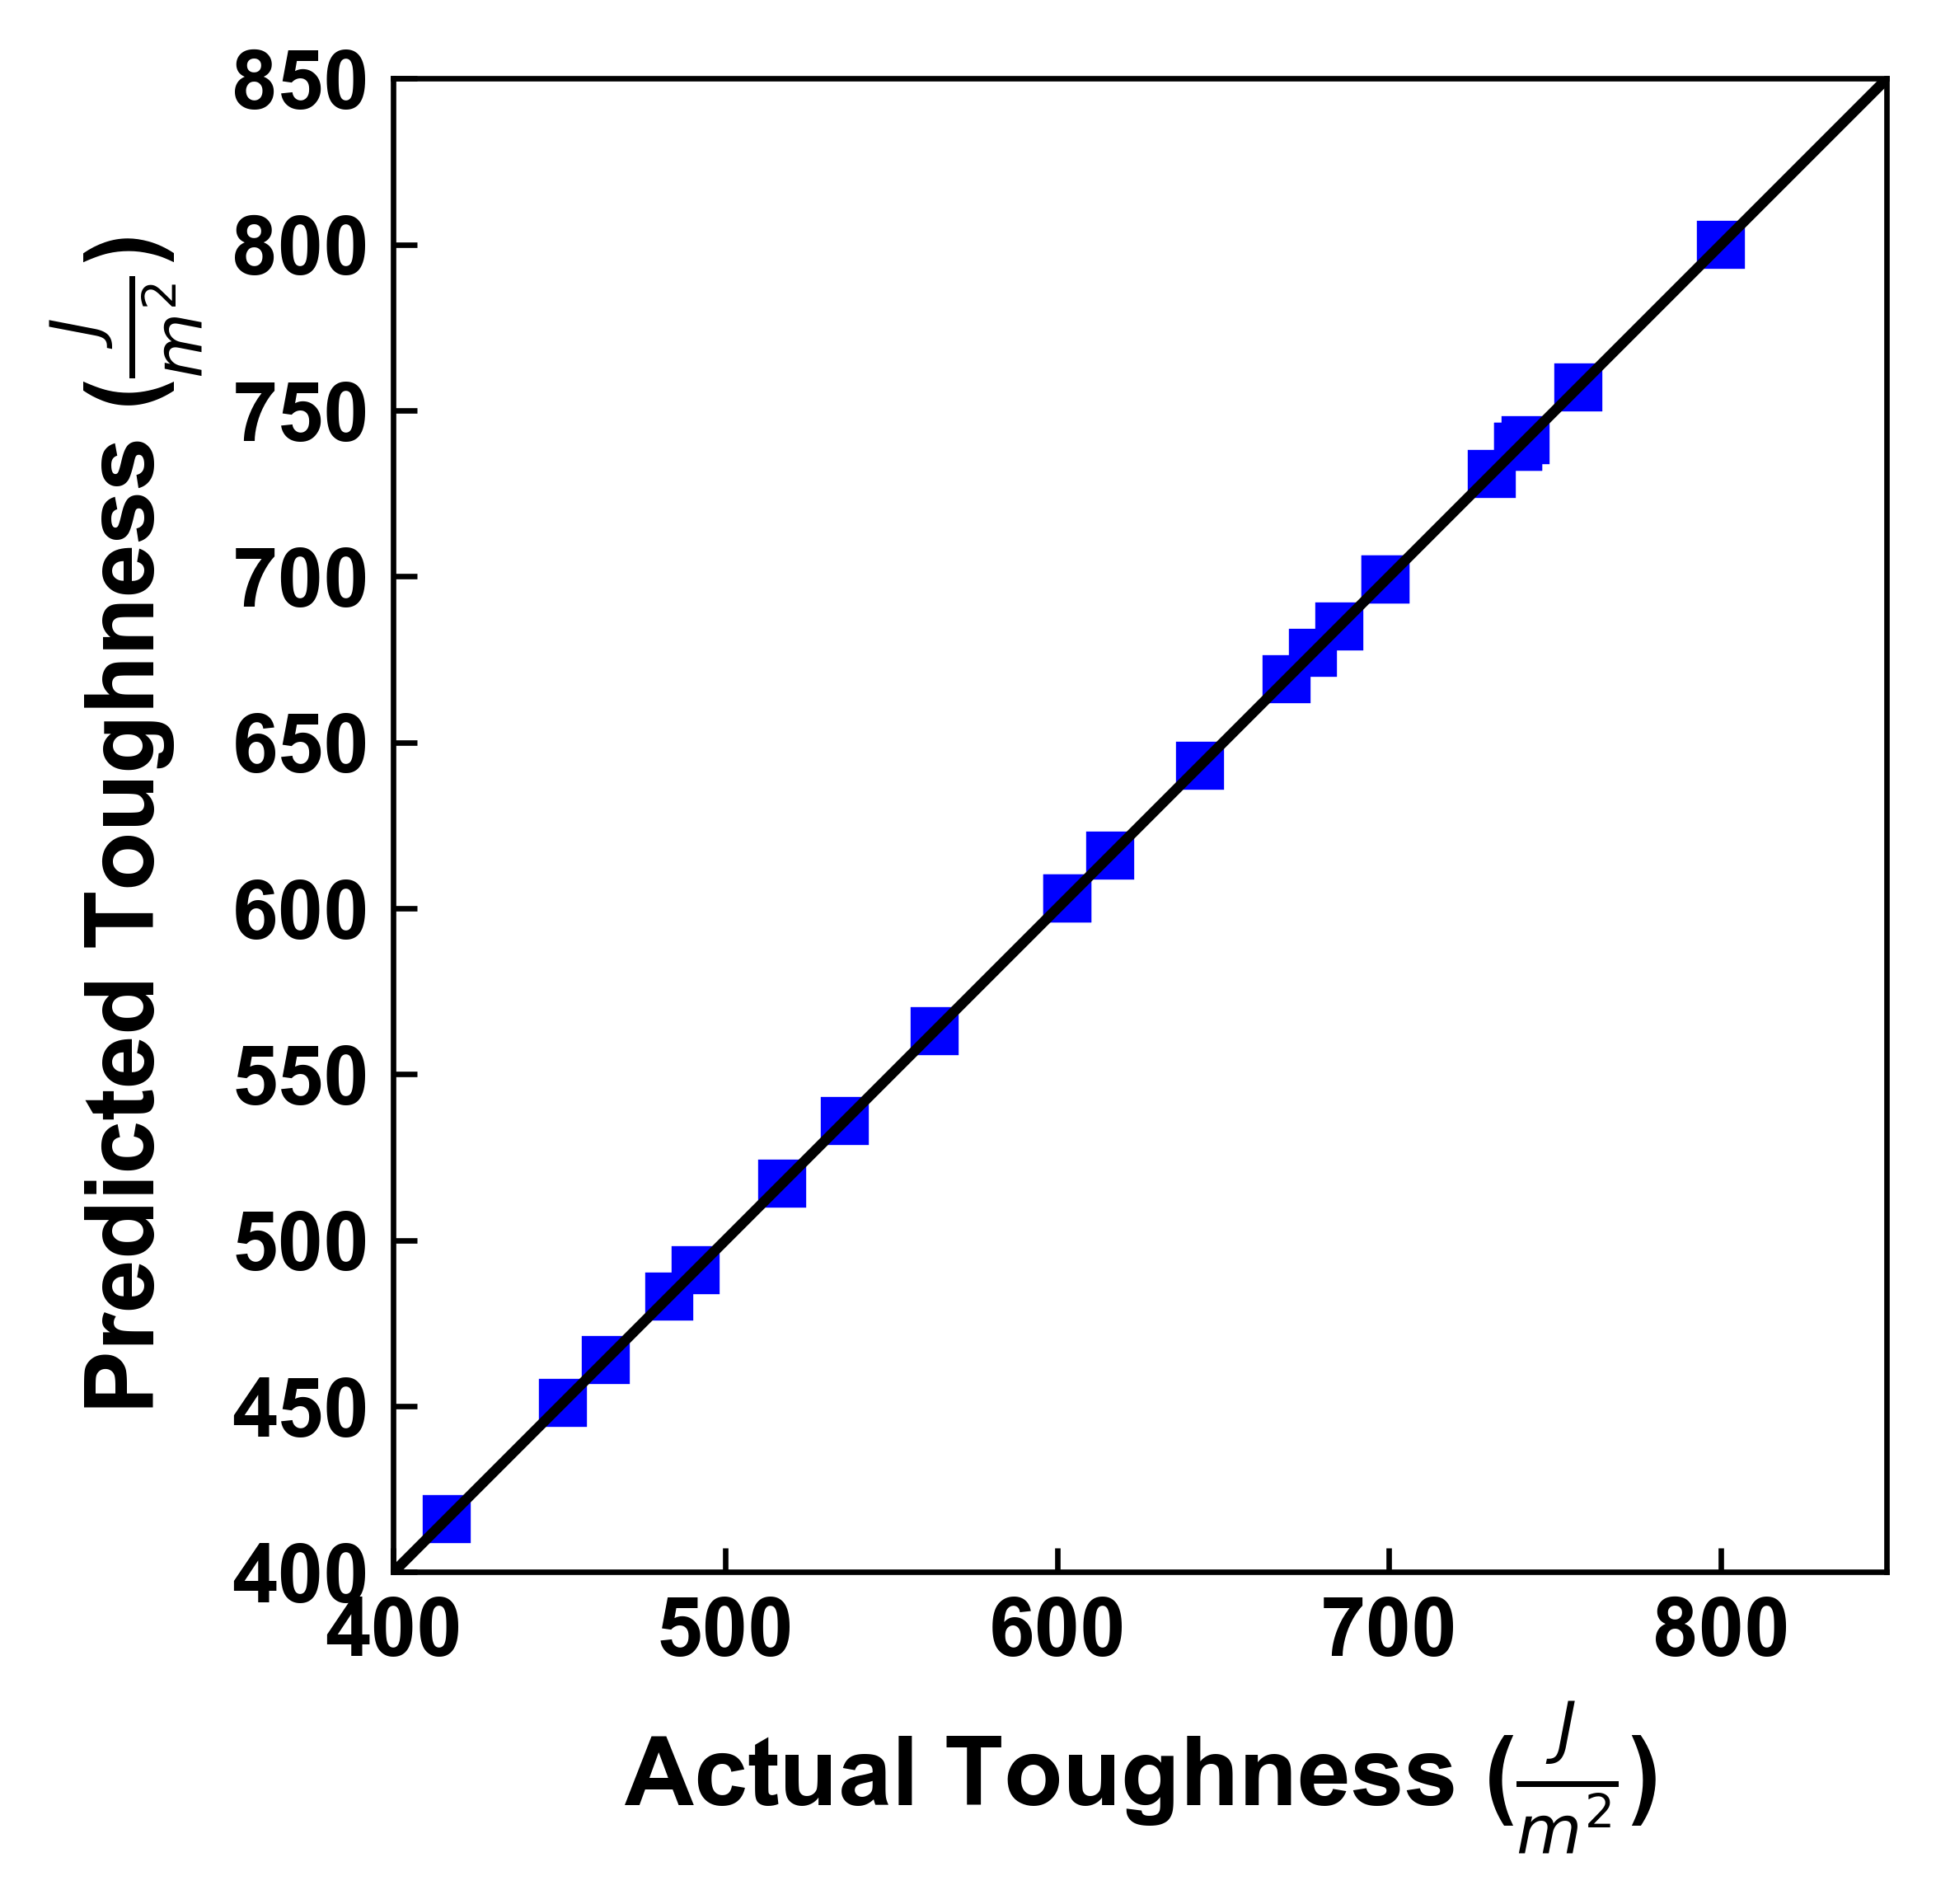

In [35]:
i = 1
dpi = 70
if i == 1:
    dpi = 600
    
lrg = 20
med = 14
sml = 12
fontname = "Arial"

nn = 0
print(f'R^2 for {performance[nn]}: {r2[performance[nn]]}')

fig,ax = plt.subplots(dpi=dpi)
ax.plot(y[performance[nn]],y_pred_GPR[performance[nn]],'bs')
low = 400
high = 850
ax.plot([low,high],[low,high],'k-')
ax.set_xlim([low,high])
ax.set_ylim([low,high])
ax.set_xlabel(r'Actual Toughness ($\frac{J}{m^2}$)',
             fontsize=med,
             fontweight="bold",
             fontname=fontname)
ax.set_ylabel(r'Predicted Toughness ($\frac{J}{m^2}$)',
             fontsize=med,
             fontweight="bold",
             fontname=fontname)
ax.tick_params(axis='both',
               labelsize=sml,
               direction = 'in')
plt.xticks(fontweight="bold",
           fontname=fontname)
plt.yticks(fontweight="bold",
           fontname=fontname)
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
plt.savefig('FIGURES/GPR_training_toughness_parity.svg')
plt.show()

### Plotting for Modulus

R^2 for Modulus (GPa): 0    1.0
Name: Modulus (GPa), dtype: float64


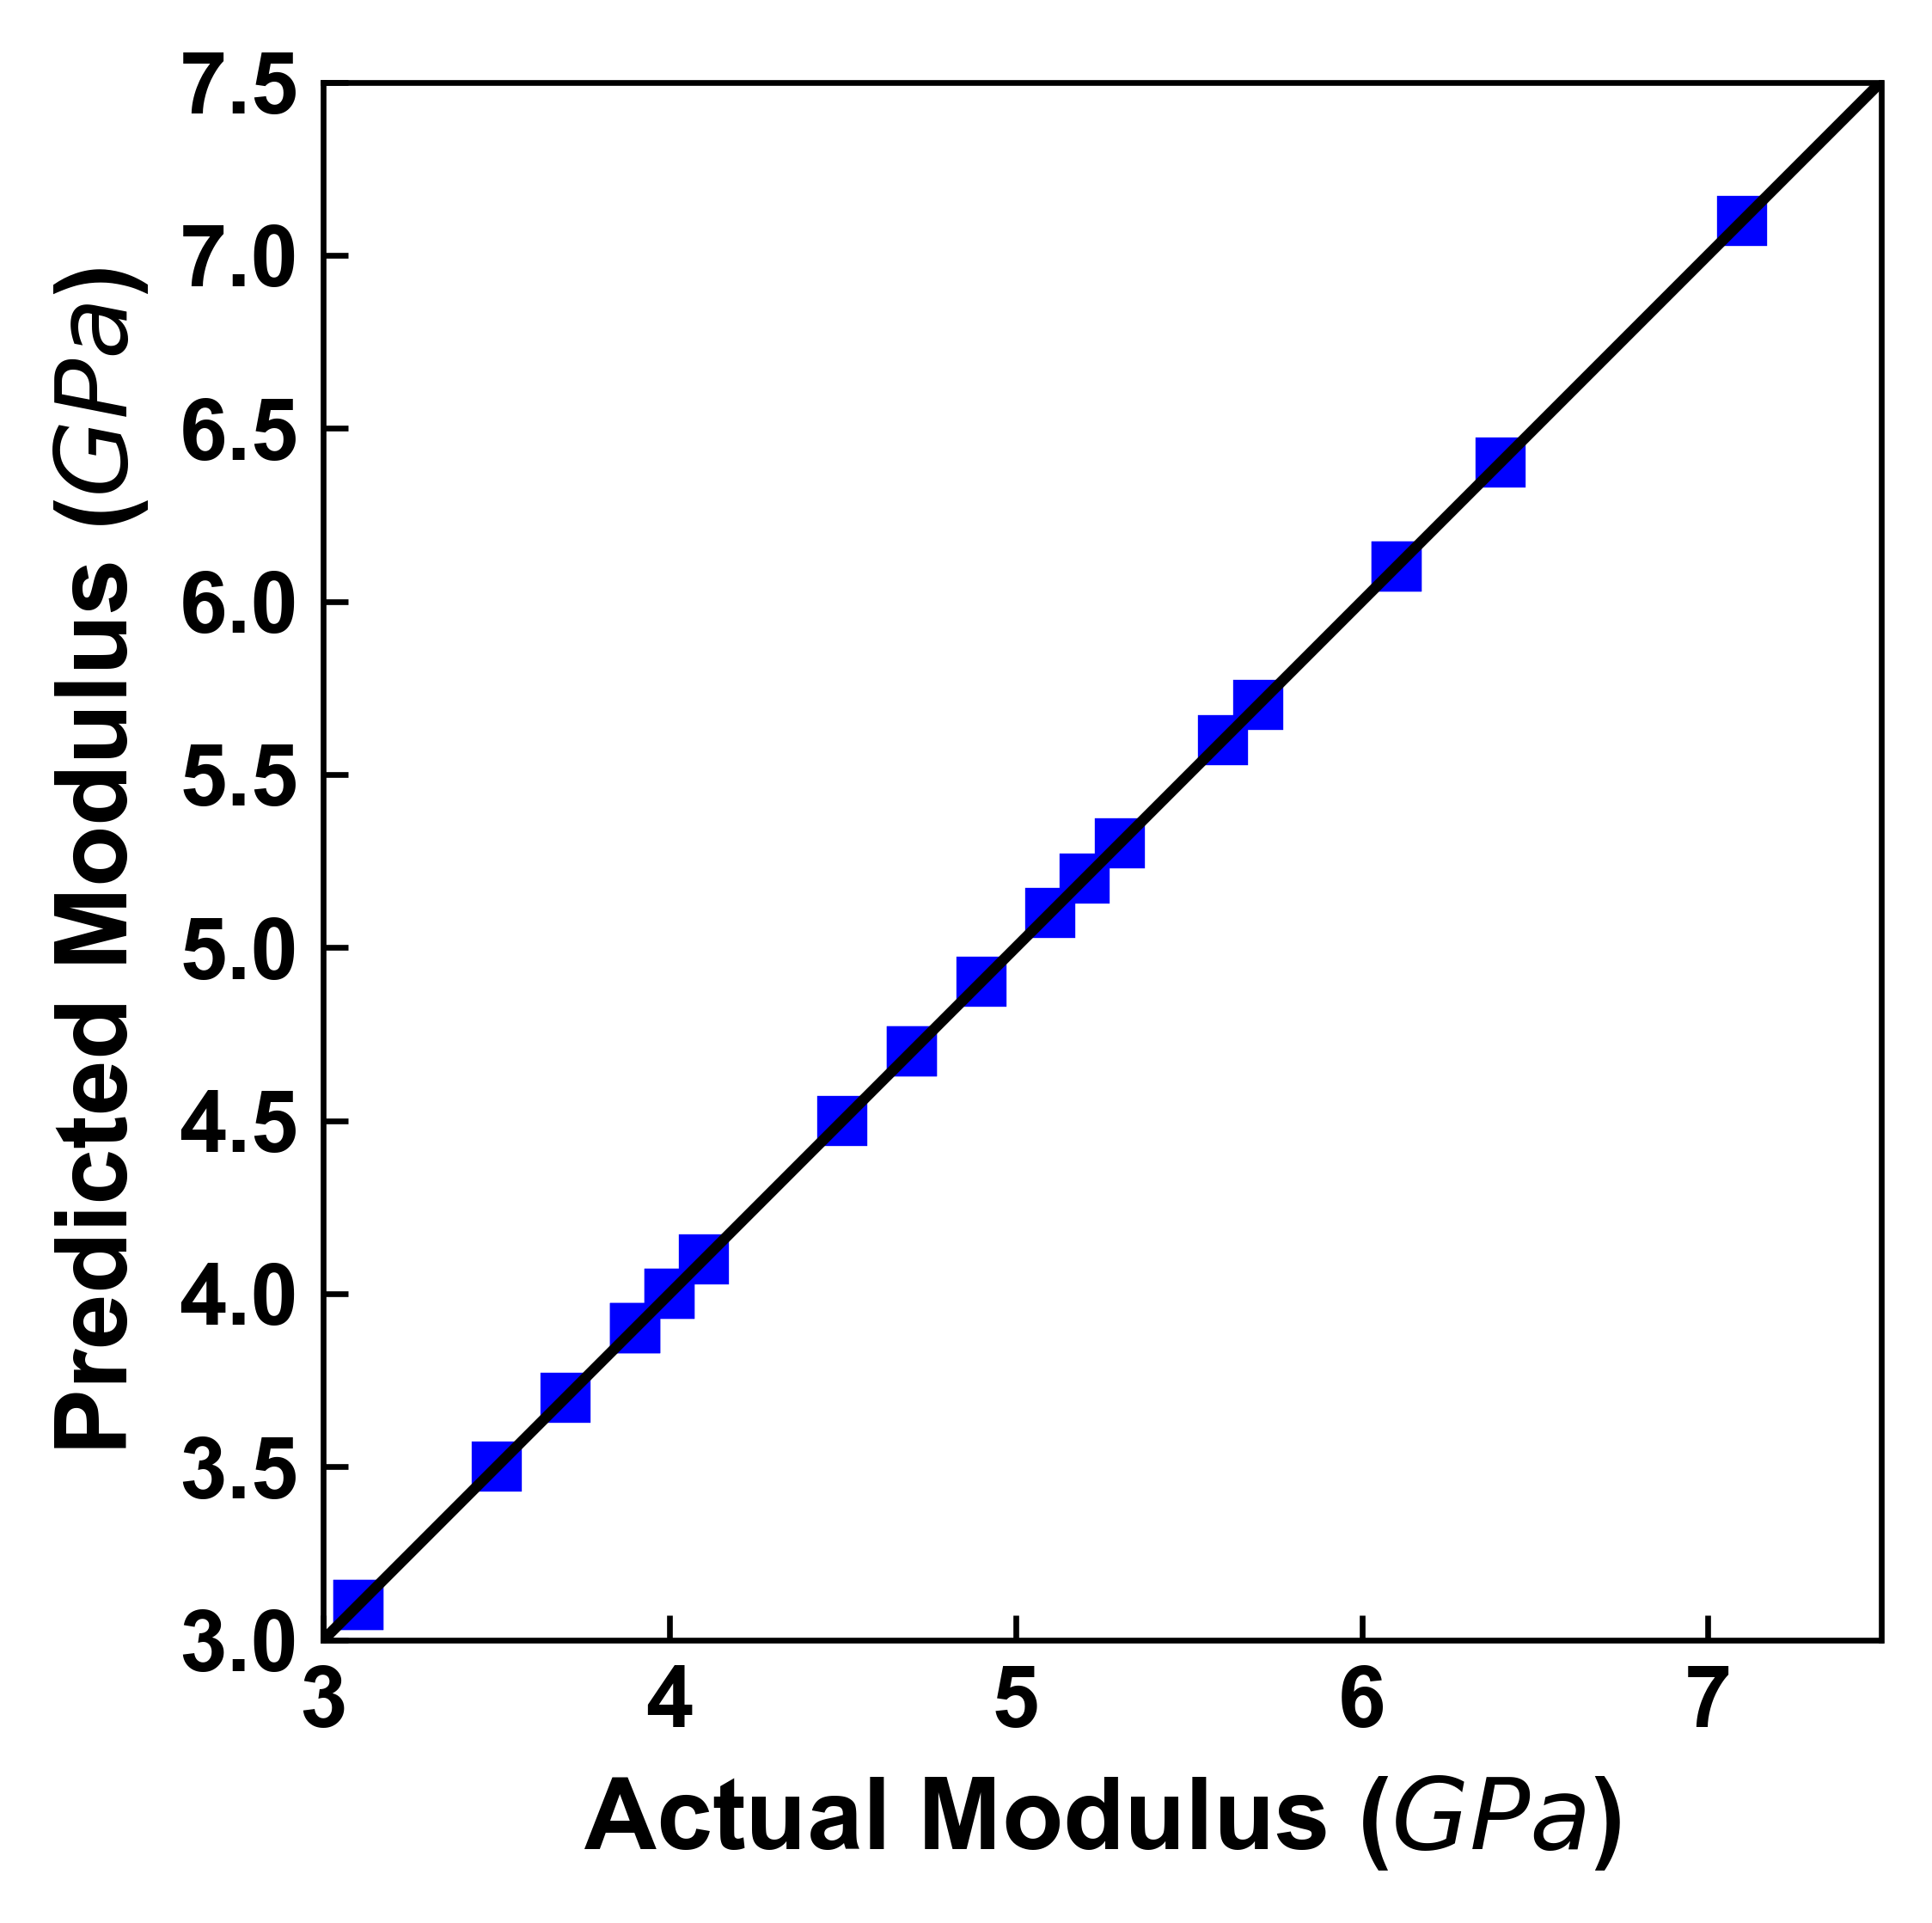

In [36]:
nn = 1
print(f'R^2 for {performance[nn]}: {r2[performance[nn]]}')

fig,ax = plt.subplots(dpi=dpi)
ax.plot(y[performance[nn]],y_pred_GPR[performance[nn]],'bs')
low = 3
high = 7.5
ax.plot([low,high],[low,high],'k-')
ax.set_xlim([low,high])
ax.set_ylim([low,high])
ax.set_xlabel(r'Actual Modulus ($GPa$)',
             fontsize=med,
             fontweight="bold",
             fontname=fontname)
ax.set_ylabel(r'Predicted Modulus ($GPa$)',
             fontsize=med,
             fontweight="bold",
             fontname=fontname)
ax.tick_params(axis='both',
               labelsize=sml,
               direction = 'in')
plt.xticks(fontweight="bold",
           fontname=fontname)
plt.yticks(fontweight="bold",
           fontname=fontname)
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
plt.savefig('FIGURES/GPR_training_modulus_parity.svg')
plt.show()

### K Fold Validation

In [37]:
k = 5
kf = KFold(n_splits=k,shuffle=True,random_state=1743)

kernel = C() + RBF(length_scale=np.ones(X.shape[1]))
model_0 = GaussianProcessRegressor(kernel=kernel,random_state=842)
model_1 = GaussianProcessRegressor(kernel=kernel,random_state=842)

mape_scores_tough = []
mape_scores_mod = []
r2_scores_tough = []
r2_scores_mod = []


for train_index, test_index in kf.split(X):
    # Splitting into training and testing arrays
    X_train, X_val = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train, y_val = y.iloc[train_index,:],y.iloc[test_index,:]
    
    # Train the model
    model_0.fit(X_train,y_train[performance[0]])
    model_1.fit(X_train,y_train[performance[1]])
    
    # Predictions
    y_p = pd.DataFrame({performance[0]:model_0.predict(X_val),
                           performance[1]:model_1.predict(X_val)})
    
    # Metric for validation
    mape_tough = mape(y_val[performance[0]],y_p[performance[0]])
    mape_mod = mape(y_val[performance[1]],y_p[performance[1]])
    #Append to list of MSE
    mape_scores_tough.append(mape_tough)
    mape_scores_mod.append(mape_mod)
    
    r2_tough = r2_score(y_val[performance[0]],y_p[performance[0]])
    r2_mod = r2_score(y_val[performance[1]],y_p[performance[1]])
    
    r2_scores_tough.append(r2_tough)
    r2_scores_mod.append(r2_mod)

### Make a table

In [38]:
df_scores = pd.DataFrame({
    'MAPE Toughness':mape_scores_tough,
    'MAPE Modulus':mape_scores_mod,
    'R2 Toughness':r2_scores_tough,
    'R2 Modulus':r2_scores_mod}) 

df_scores

,MAPE Toughness,MAPE Modulus,R2 Toughness,R2 Modulus
0,0.031556,0.077577,0.891464,0.465408
1,0.026264,0.070586,0.961630,0.890147
2,0.026415,0.106616,0.954618,0.752589
3,0.084253,0.122708,0.826423,0.796297
4,0.045583,0.078370,0.941255,0.733993


We do not expect this Gaussian process regression model to generalize to the testing dataset because the KFold validation shows a negative $R^2$ for all folds in both toughness and modulus.

### Export to Excel

In [39]:
df_scores.to_excel('ANALYSIS/GPR_KFold.xlsx',index=False)

### INPUT TEST SET - GAUSSIAN PROCESS REGRESSION

Below is the code for importing test data to compare against the predictions for Gaussian process regression. In this case we use the linear regression model 'reg' which was trained on all available data.

The code below must be converted from a "raw NBConvert" to a "cell" to be run after the file name is input.

                                  0
R^2 for Toughness (J/m2)   0.798481
R^2 for Modulus (GPa)      0.743240
MAPE for Toughness (J/m2)  0.050777
MAPE for Modulus (GPa)     0.061423


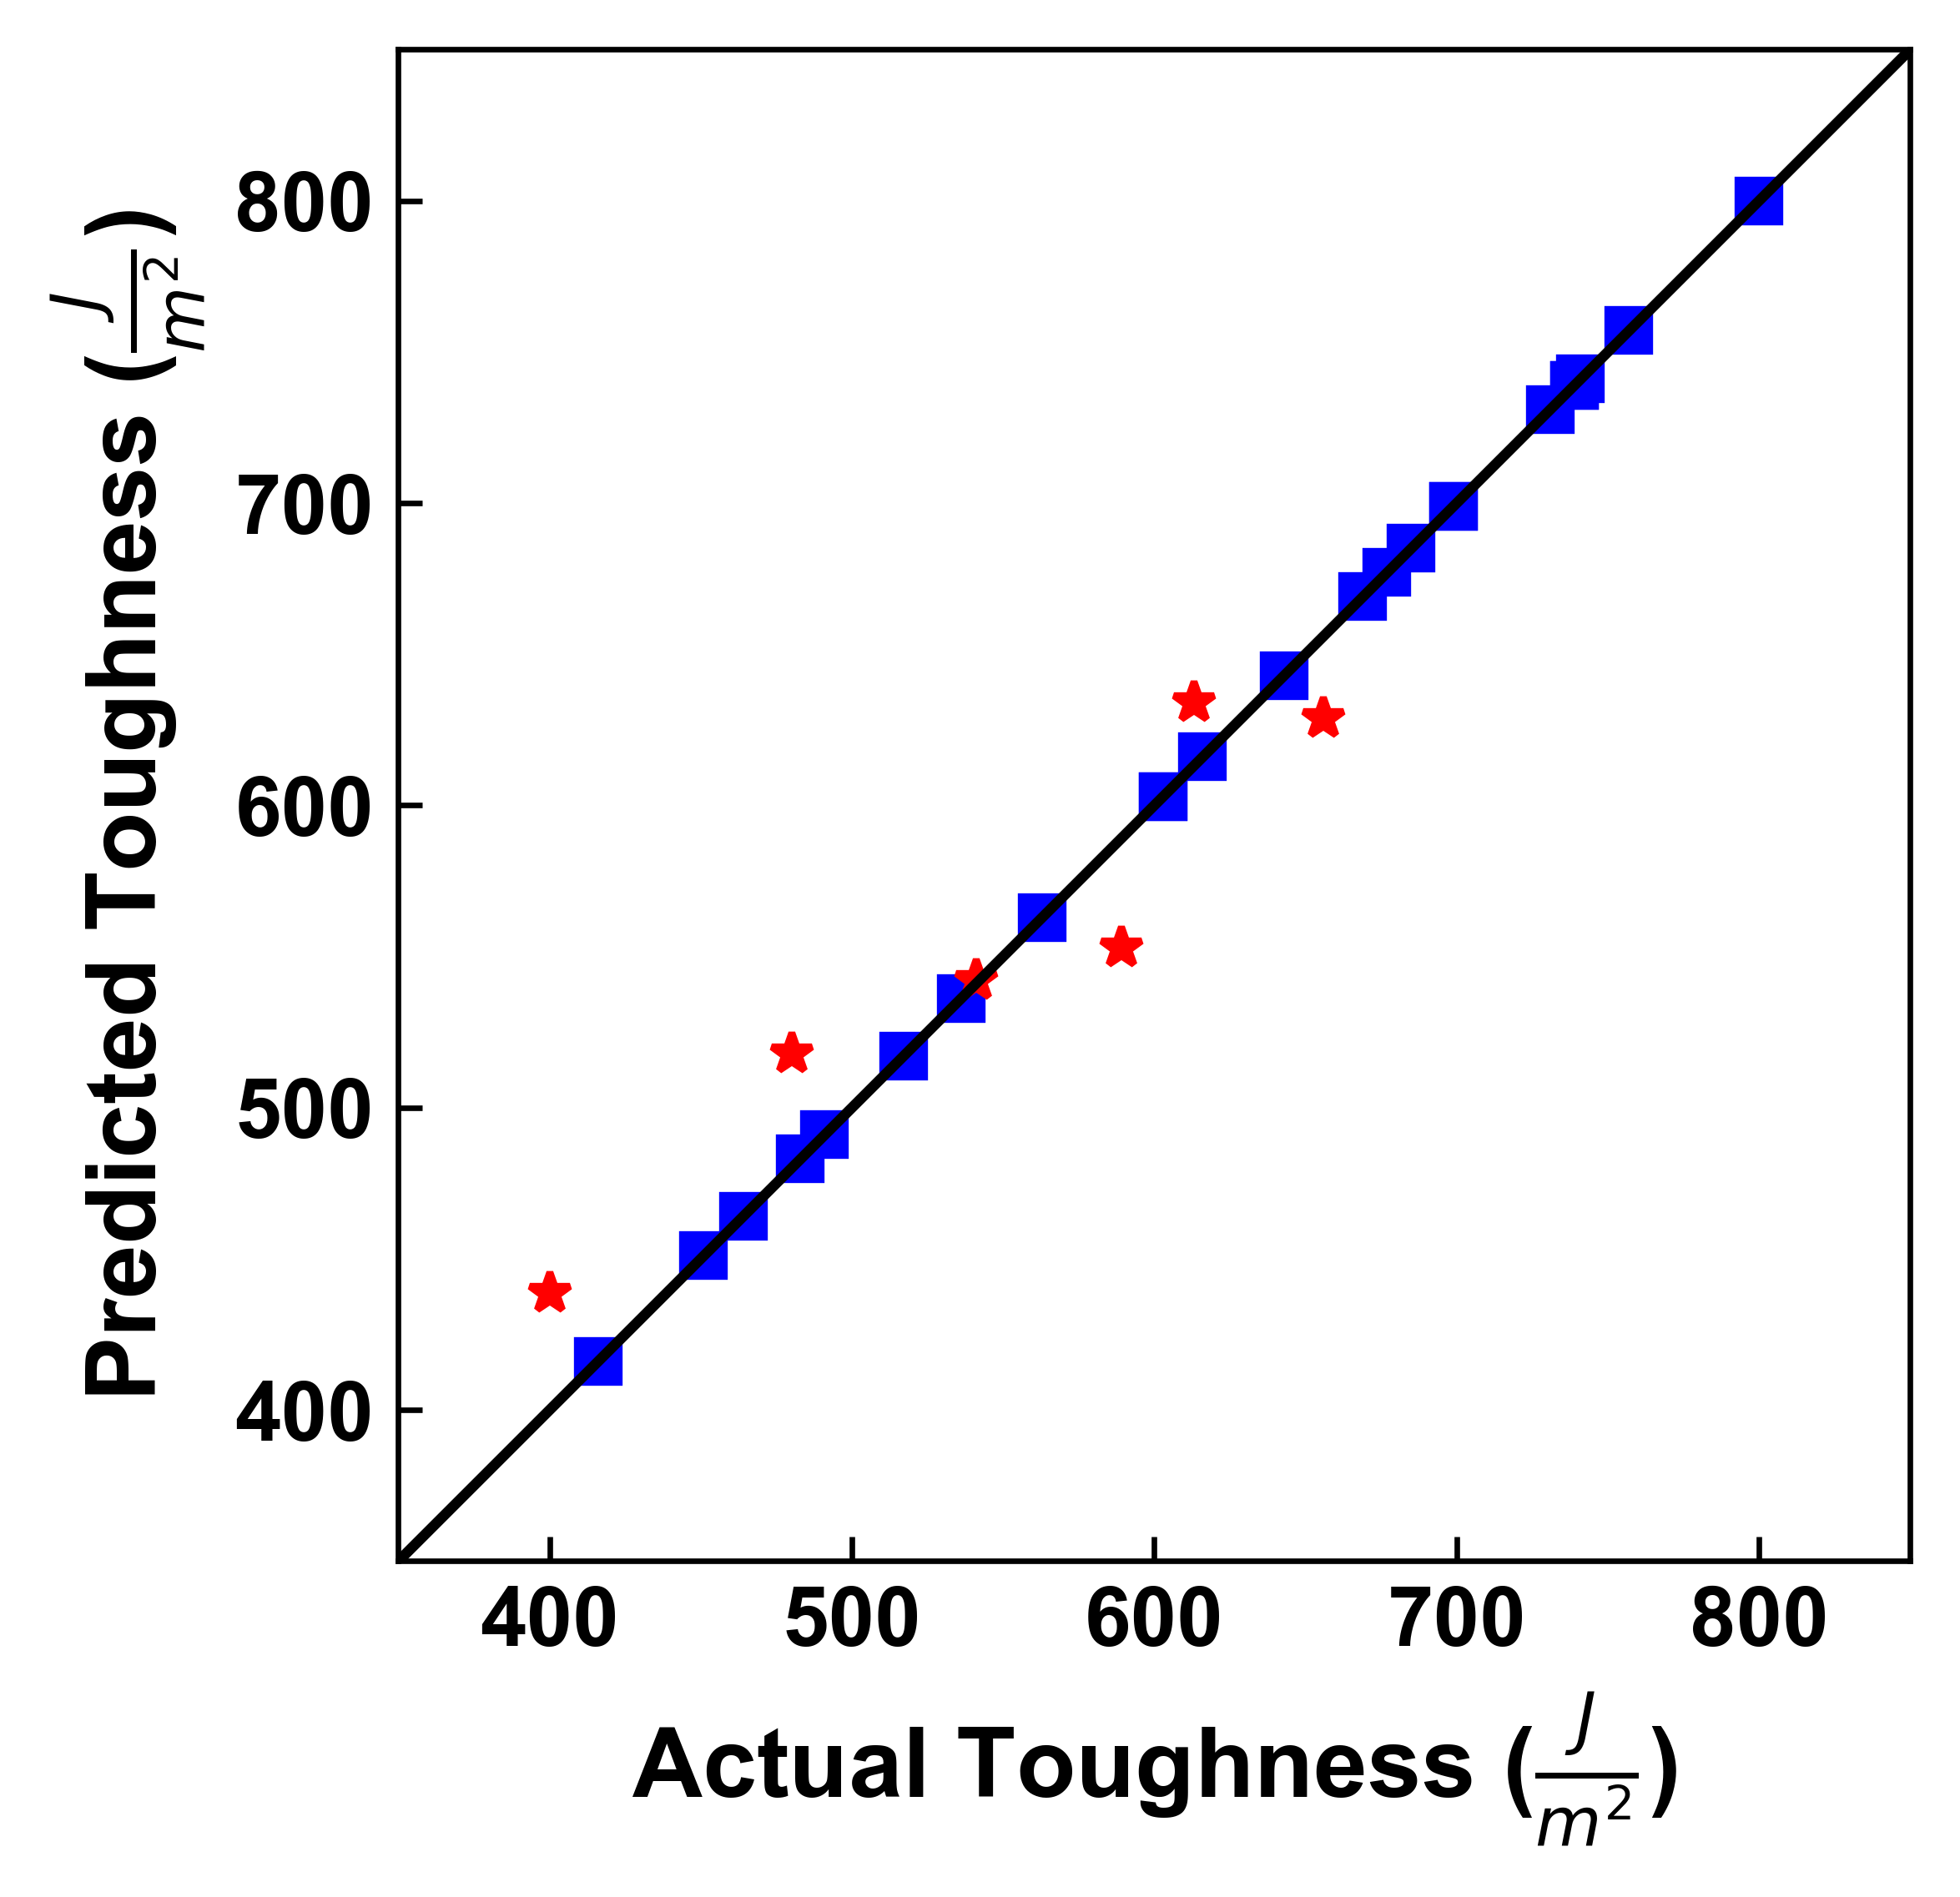

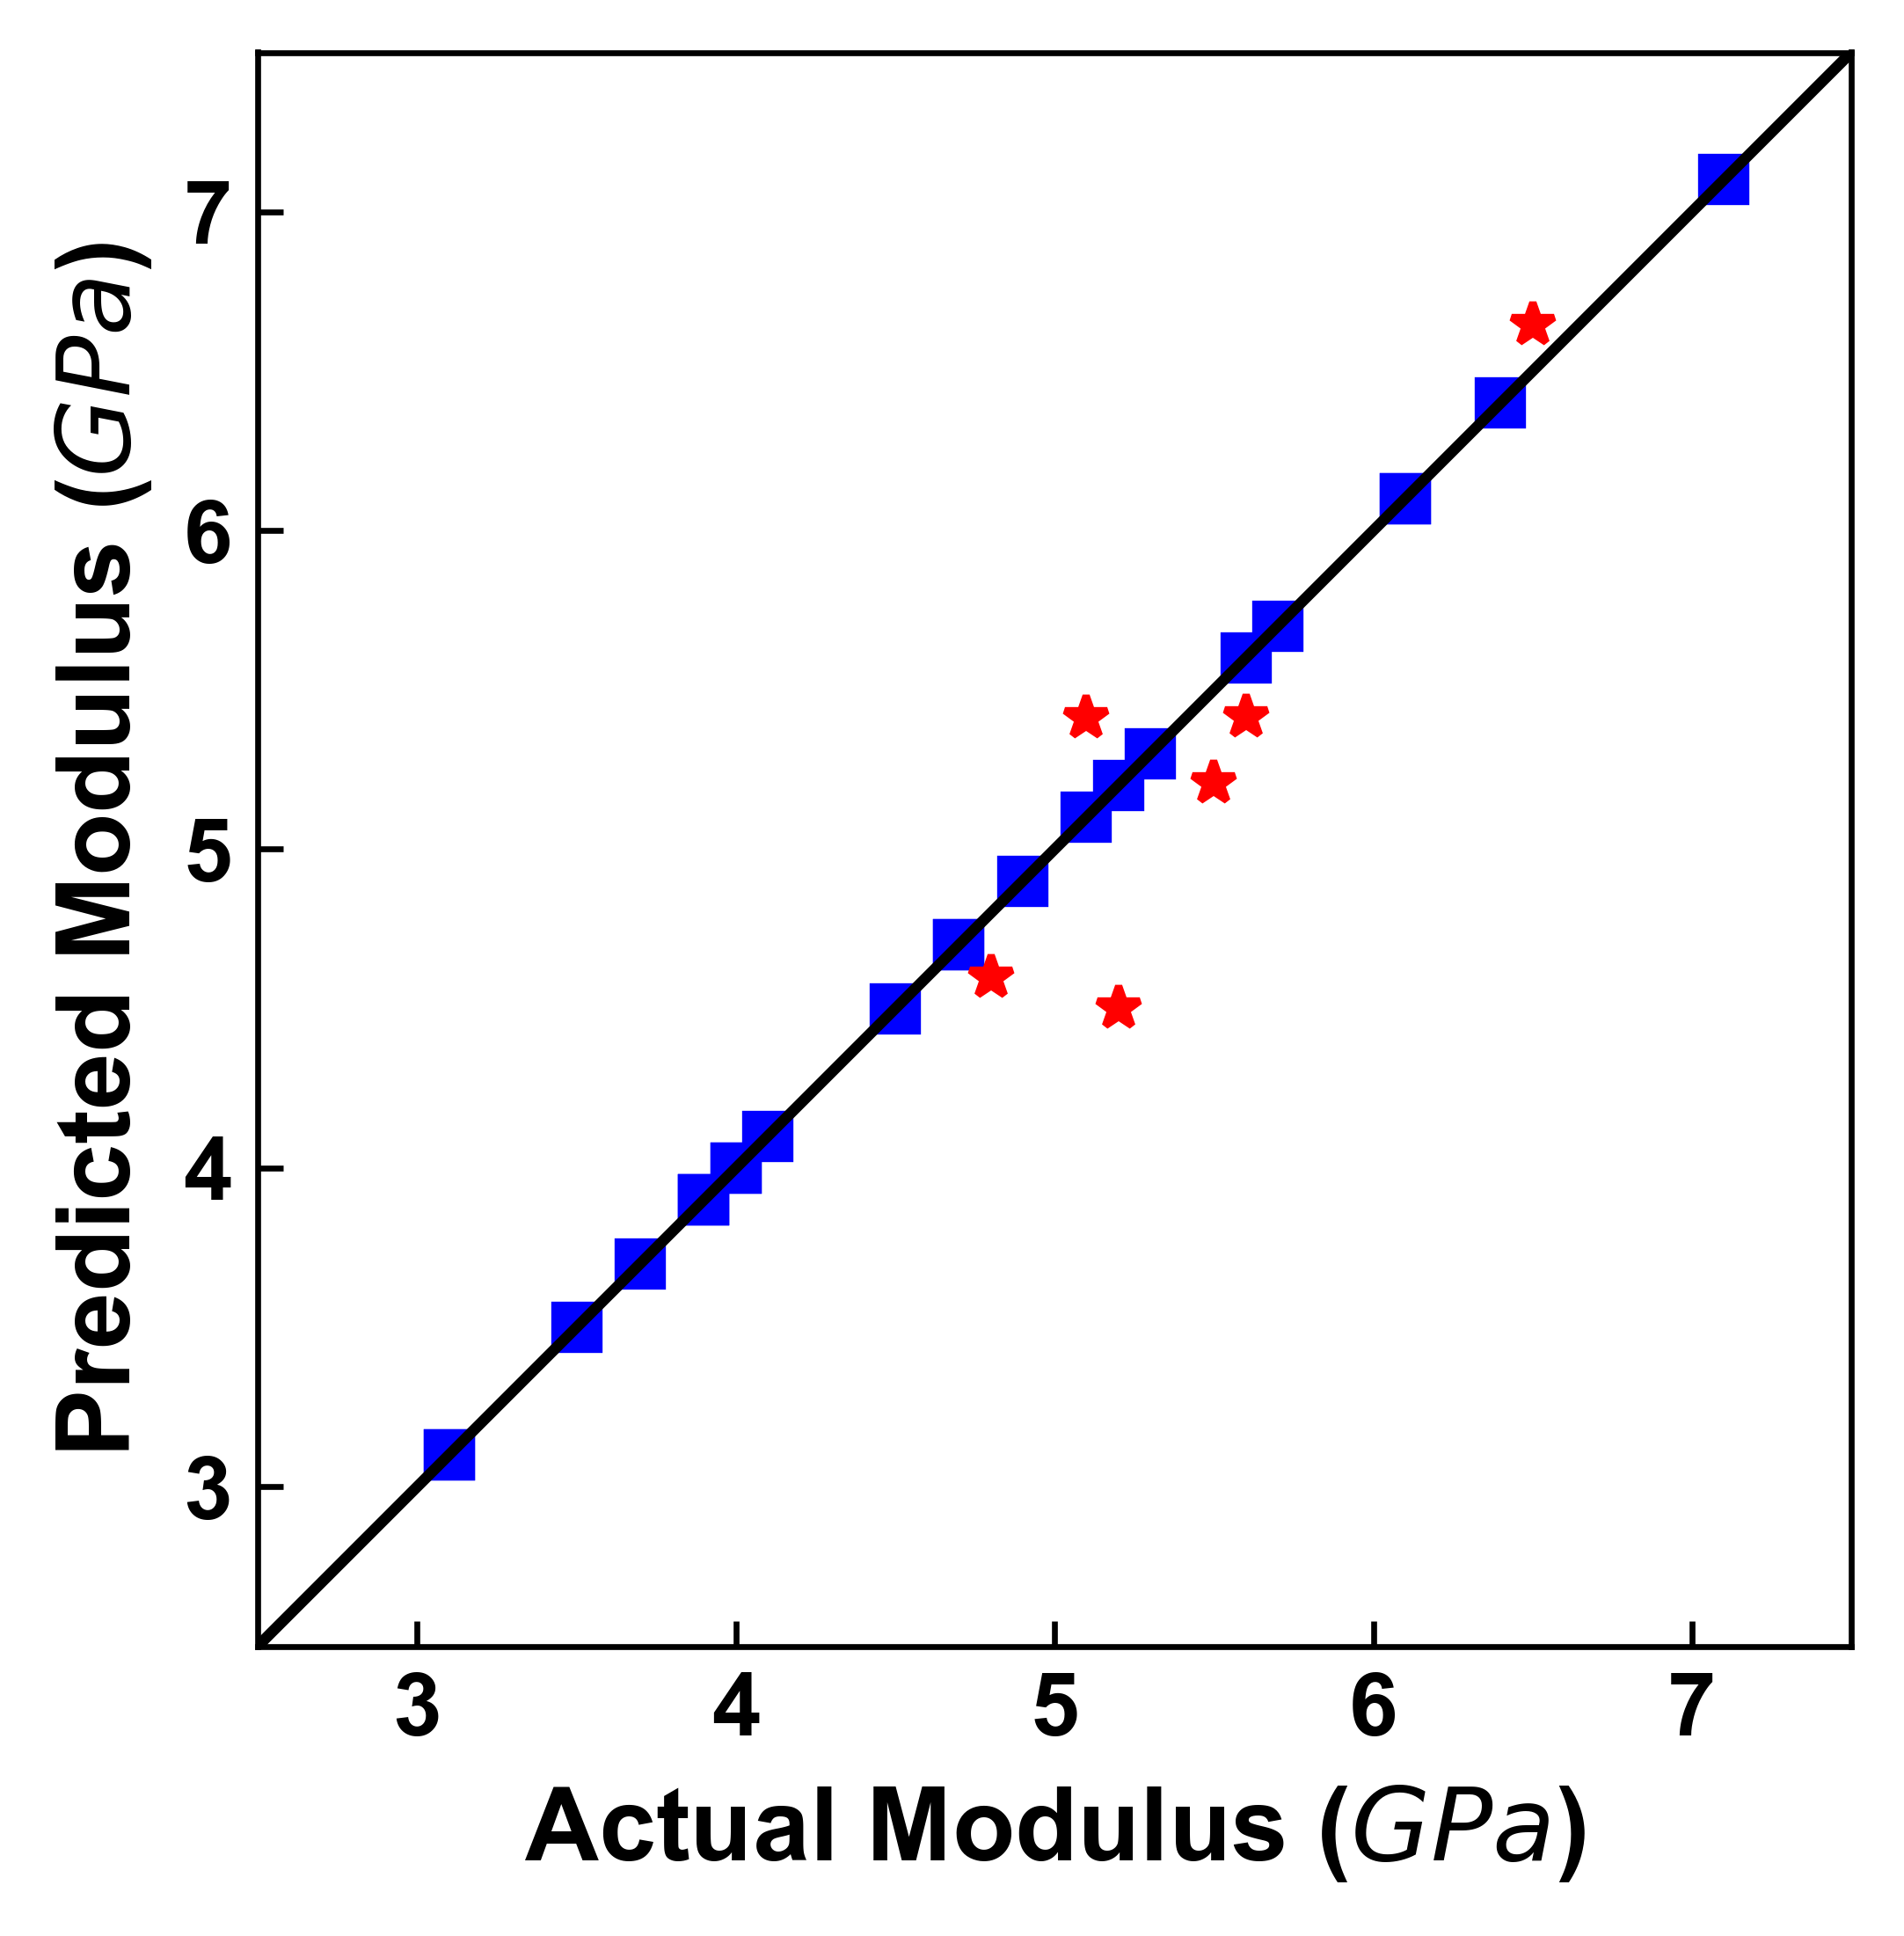

In [40]:
file = 'DATA/testing_inputs.xlsx' # Input correct file name here and the rest of the code should run

df = pd.read_excel(file)

X_test = df[design]
y_test = df[performance]

X_test = scaler.transform(X_test)

y_test_pred_0 = reg_0.predict(X_test)
y_test_pred_1 = reg_1.predict(X_test)
y_test_pred_GPR = pd.DataFrame({
    performance[0]:y_test_pred_0,
    performance[1]:y_test_pred_1
                           })

nn = 0
r2_tough = r2_score(y_test_pred_GPR[performance[nn]],y_test[performance[nn]])
mape_tough = mape(y_test_pred_GPR[performance[nn]],y_test[performance[nn]])

nn = 1
r2_mod = r2_score(y_test_pred_GPR[performance[nn]],y_test[performance[nn]])
mape_mod = mape(y_test_pred_GPR[performance[nn]],y_test[performance[nn]])

df_metrics = pd.DataFrame({
f'R^2 for {performance[0]}':[r2_tough],
f'R^2 for {performance[1]}':[r2_mod],
f'MAPE for {performance[0]}':[mape_tough],
f'MAPE for {performance[1]}':[mape_mod]
})

print(df_metrics.T)

# Plotting Toughness with Training and Testing
fig,ax = plt.subplots(dpi=dpi)
nn = 0
ax.plot(y[performance[nn]],y_pred_GPR[performance[nn]],'sb')
ax.plot(y_test[performance[nn]],y_test_pred_GPR[performance[nn]],'*r')
low = 350
high = 850
ax.plot([low,high],[low,high],'k-')
ax.set_xlim([low,high])
ax.set_ylim([low,high])
ax.set_xlabel(r'Actual Toughness ($\frac{J}{m^2}$)',
             fontsize=med,
             fontweight="bold",
             fontname=fontname)
ax.set_ylabel(r'Predicted Toughness ($\frac{J}{m^2}$)',
             fontsize=med,
             fontweight="bold",
             fontname=fontname)
ax.tick_params(axis='both',
               labelsize=sml,
               direction = 'in')
plt.xticks(fontweight="bold",
           fontname=fontname)
plt.yticks(fontweight="bold",
           fontname=fontname)
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
plt.savefig('FIGURES/GPR_training_testing_toughness_parity.svg')
plt.show()

# Plotting Modulus with Training and Testing
fig,ax = plt.subplots(dpi=dpi)
nn = 1
ax.plot(y[performance[nn]],y_pred_GPR[performance[nn]],'sb')
ax.plot(y_test[performance[nn]],y_test_pred_GPR[performance[nn]],'*r')
low = 2.5
high = 7.5
ax.plot([low,high],[low,high],'k-')
ax.set_xlim([low,high])
ax.set_ylim([low,high])
ax.set_xlabel(r'Actual Modulus ($GPa$)',
             fontsize=med,
             fontweight="bold",
             fontname=fontname)
ax.set_ylabel(r'Predicted Modulus ($GPa$)',
             fontsize=med,
             fontweight="bold",
             fontname=fontname)
ax.tick_params(axis='both',
               labelsize=sml,
               direction = 'in')
plt.xticks(fontweight="bold",
           fontname=fontname)
plt.yticks(fontweight="bold",
           fontname=fontname)
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
plt.savefig('FIGURES/GPR_training_testing_modulus_parity.svg')
plt.show()